In [1]:
# Import general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
# Load dataset into dataframe
path = r"weather.csv"
df = pd.read_csv(path, skiprows=9) # skip first 8 rows
df.head(n=15)

timestamp  Basel Temperature [2 m elevation corrected]  \
0   20180101T0000                                    10.960529   
1   20180101T0100                                    10.500529   
2   20180101T0200                                     9.790529   
3   20180101T0300                                     8.970529   
4   20180101T0400                                     8.690529   
5   20180101T0500                                     7.960528   
6   20180101T0600                                     7.360529   
7   20180101T0700                                     6.810529   
8   20180101T0800                                     6.150528   
9   20180101T0900                                     5.900528   
10  20180101T1000                                     5.930529   
11  20180101T1100                                     6.750528   
12  20180101T1200                                     7.210528   
13  20180101T1300                                     7.820528   
14  20180101T1400                                     9.480529   

    Basel Growing Degree Days [2 m elevation corrected]  \
0                                            0.040022     
1                                            0.020855     
2                                            0.000000     
3                                            0.000000     
4                                            0.000000     
5                                            0.000000     
6                                            0.000000     
7                                            0.000000     
8                                            0.000000     
9                                            0.000000     
10                                           0.000000     
11                                           0.000000     
12                                           0.000000     
13                                           0.000000     
14                                           0.000000     

    Basel Temperature [1000 mb]  Basel Temperature [850 mb]  \
0                         12.87                        3.29   
1                         12.06                        1.47   
2                         11.33                        1.05   
3                         10.50                        0.33   
4                          9.97                        0.33   
5                          9.15                       -0.74   
6                          8.52                       -1.11   
7                          8.02                       -1.47   
8                          7.47                       -1.76   
9                          7.25                       -1.96   
10                         7.09                       -2.27   
11                         7.45                       -2.56   
12                         7.59                       -2.81   
13                         8.11                       -2.70   
14                         9.92                       -1.59   

    Basel Temperature [700 mb]  Basel Sunshine Duration  \
0                        -7.00                 0.000000   
1                        -7.92                 0.000000   
2                        -8.85                 0.000000   
3                        -9.21                 0.000000   
4                       -10.20                 0.000000   
5                       -10.20                 0.000000   
6                       -10.70                 0.000000   
7                       -11.14                 0.000000   
8                       -12.07                 0.000000   
9                       -12.39                 0.000000   
10                      -12.51                44.166668   
11                      -12.43                60.000000   
12                      -12.65                60.000000   
13                      -12.86                53.939396   
14                      -11.57                53.939396   

    Basel Shortwave Radiation  Basel Direct Shortwav

In [3]:
# Try with AR, MA, ARIMA, seasonal ARIMA, vector ARIMA models

# Convert argument to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Extract timestamp and Basel Temperature from DataFrame as sample
df = df.iloc[:, [0,3]]
df.head(n=10)

timestamp  Basel Temperature [1000 mb]
0 2018-01-01 00:00:00                        12.87
1 2018-01-01 01:00:00                        12.06
2 2018-01-01 02:00:00                        11.33
3 2018-01-01 03:00:00                        10.50
4 2018-01-01 04:00:00                         9.97
5 2018-01-01 05:00:00                         9.15
6 2018-01-01 06:00:00                         8.52
7 2018-01-01 07:00:00                         8.02
8 2018-01-01 08:00:00                         7.47
9 2018-01-01 09:00:00                         7.25

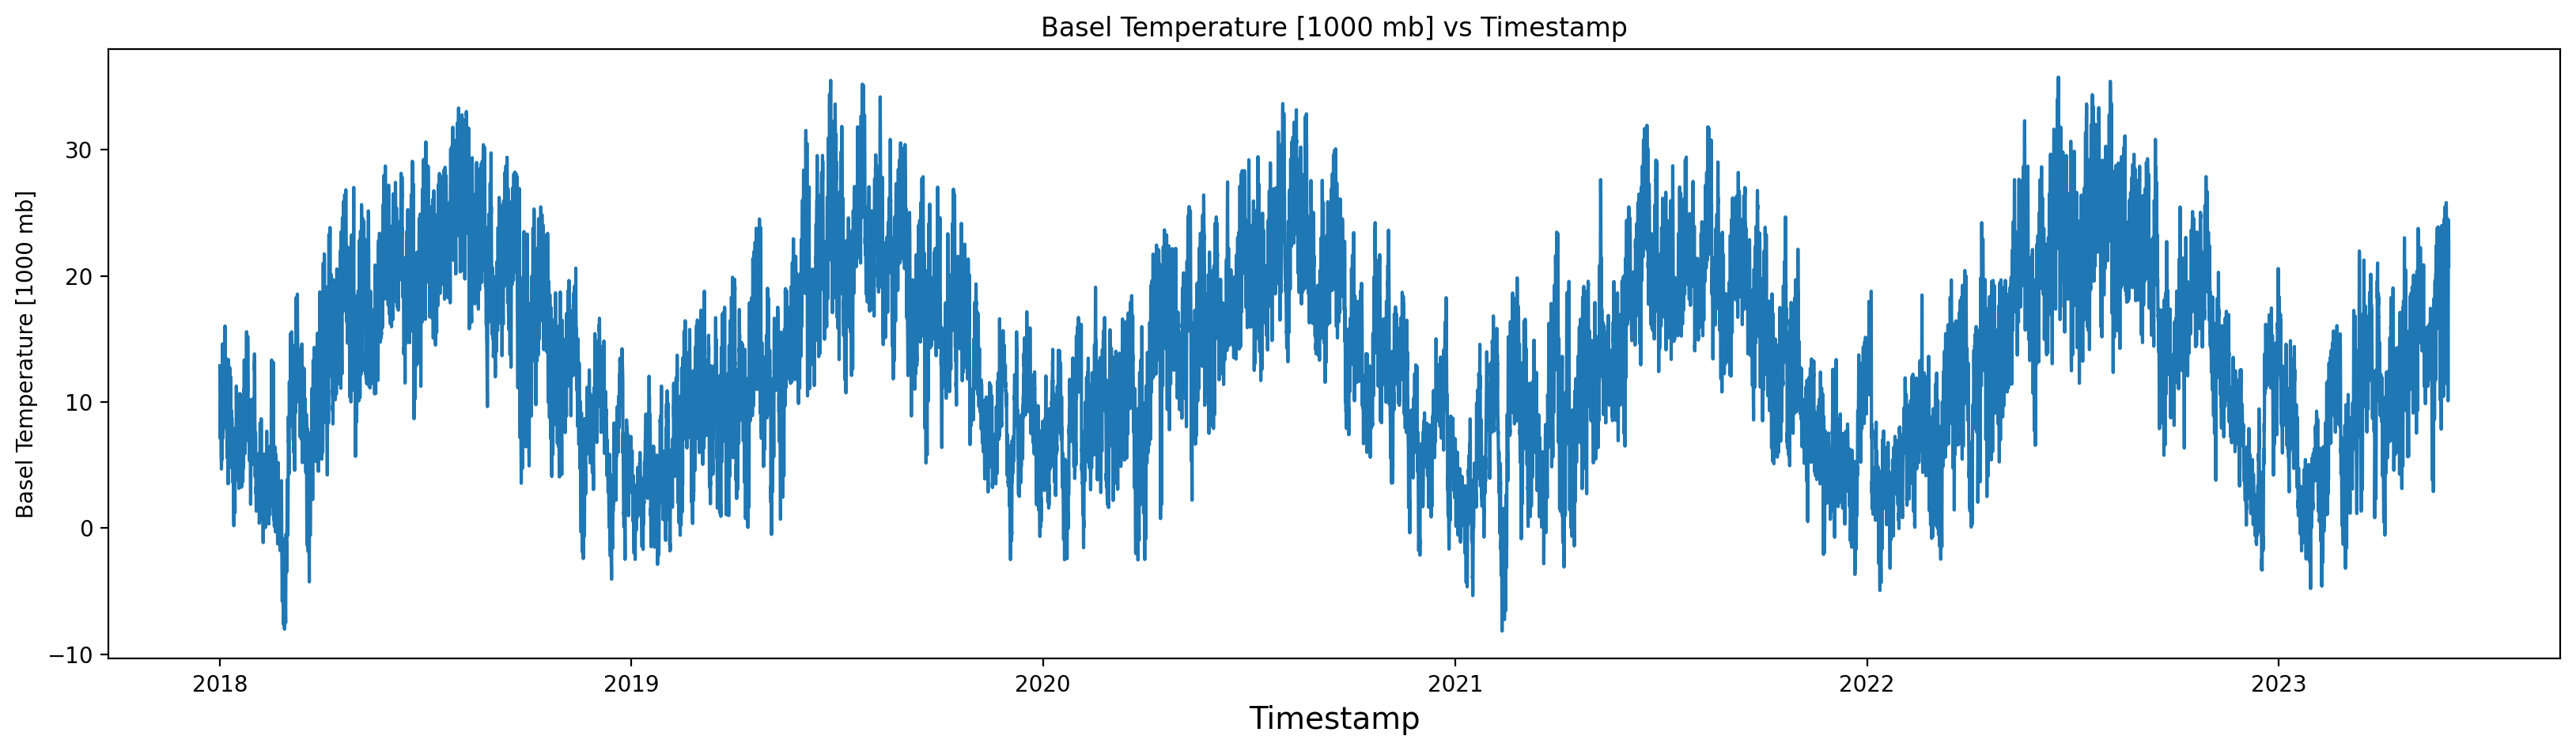

In [4]:
# Plot the whole time series graph
figure(figsize=(20, 5), dpi=200)
plt.plot(df["timestamp"], df["Basel Temperature [1000 mb]"])
plt.title("Basel Temperature [1000 mb] vs Timestamp")
plt.xlabel("Timestamp", fontsize=14)
plt.ylabel("Basel Temperature [1000 mb]", fontsize=10)
plt.show()

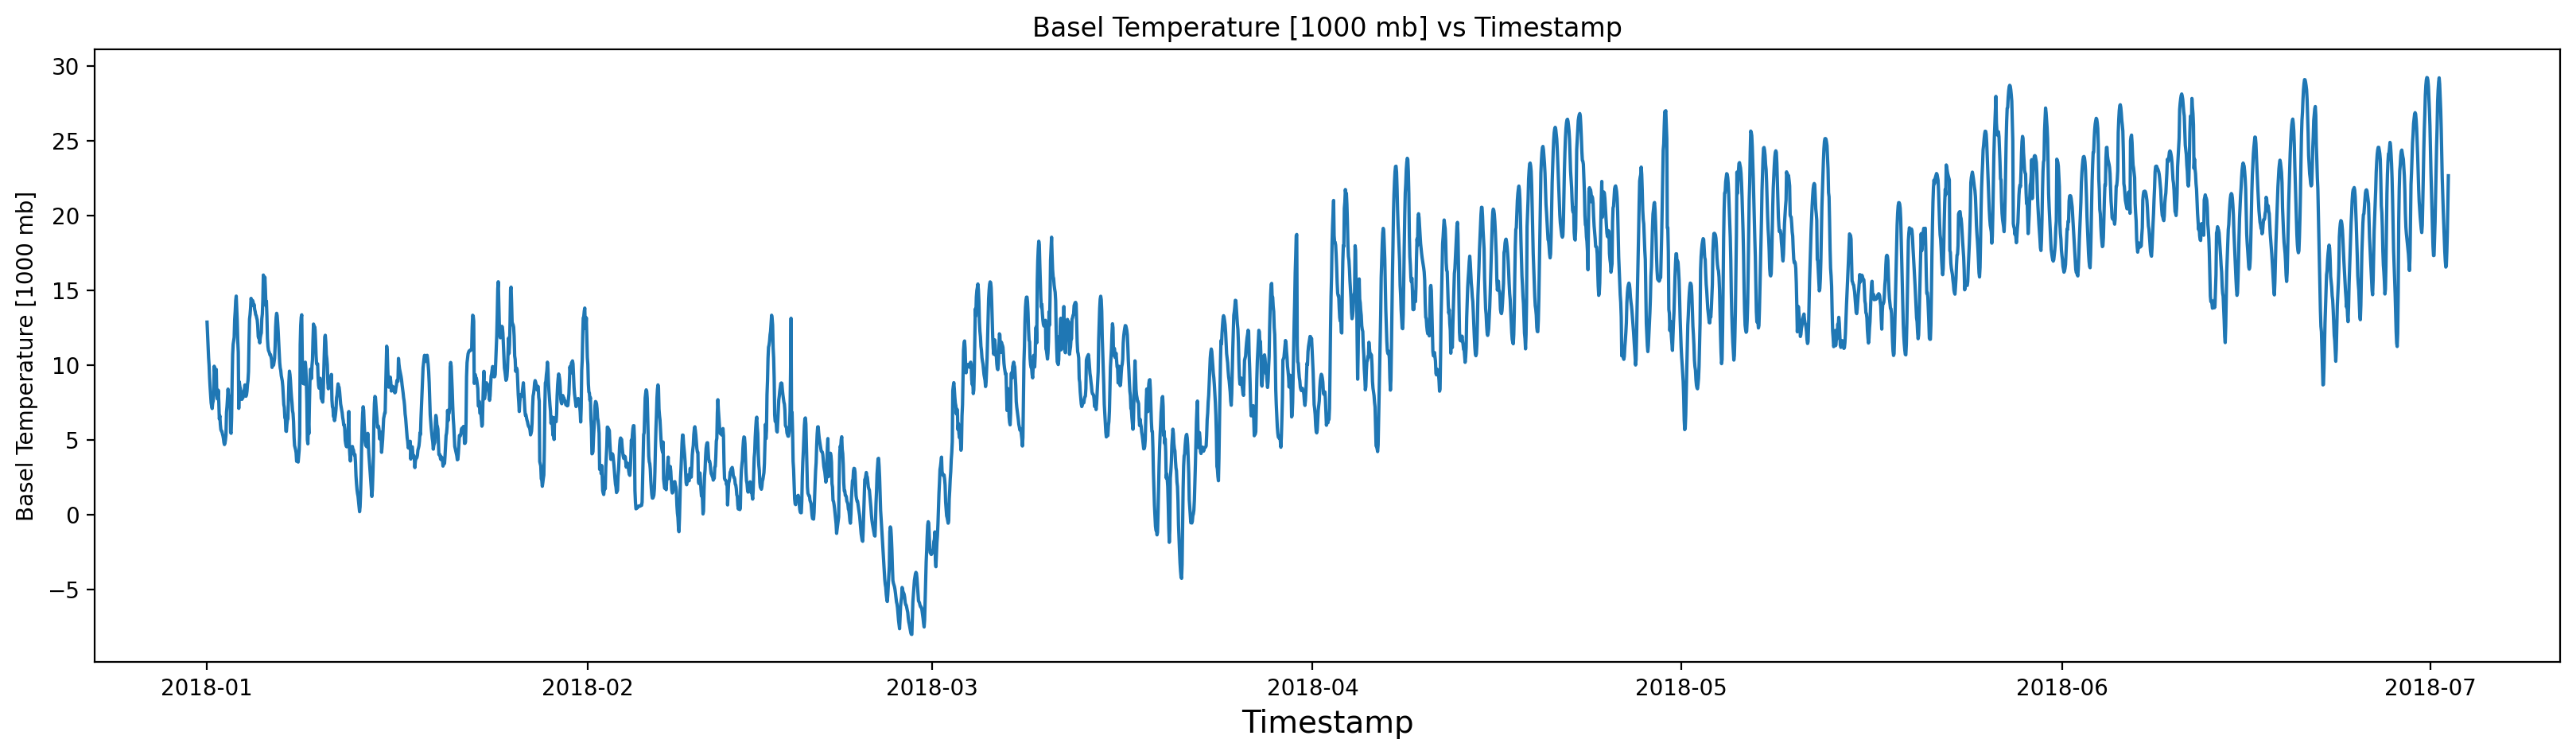

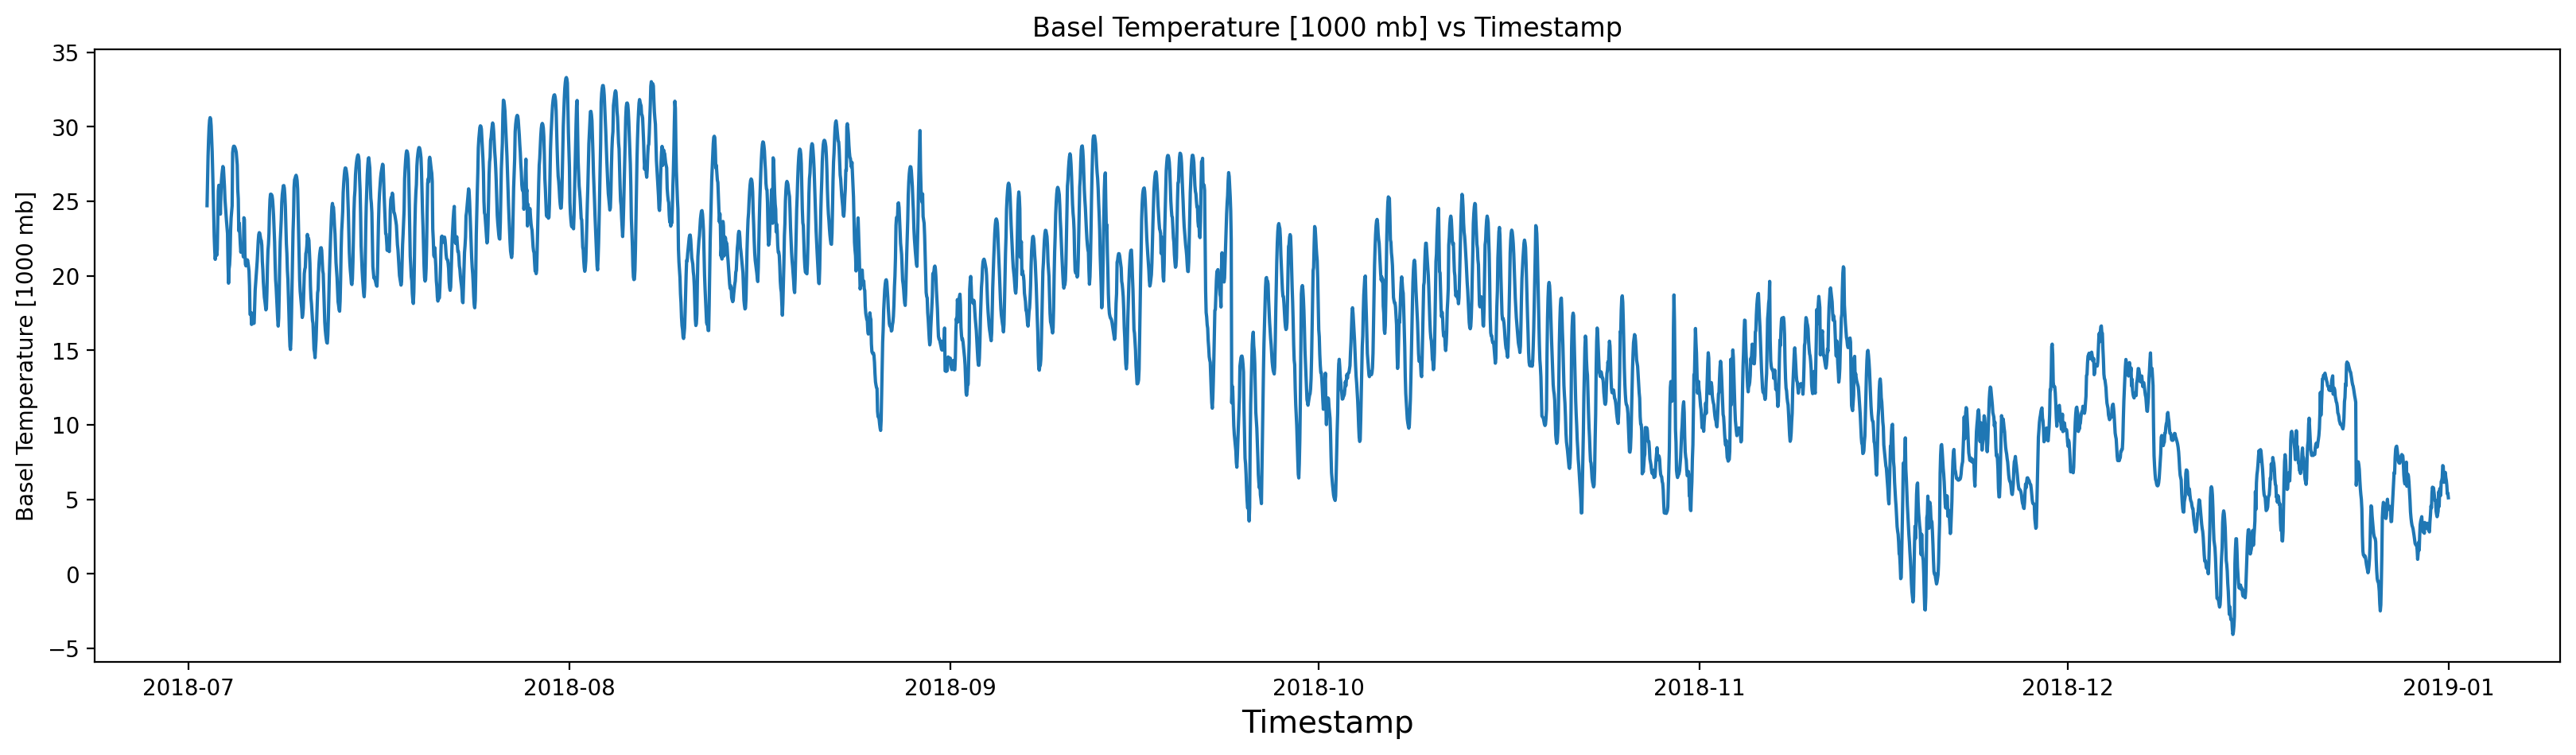

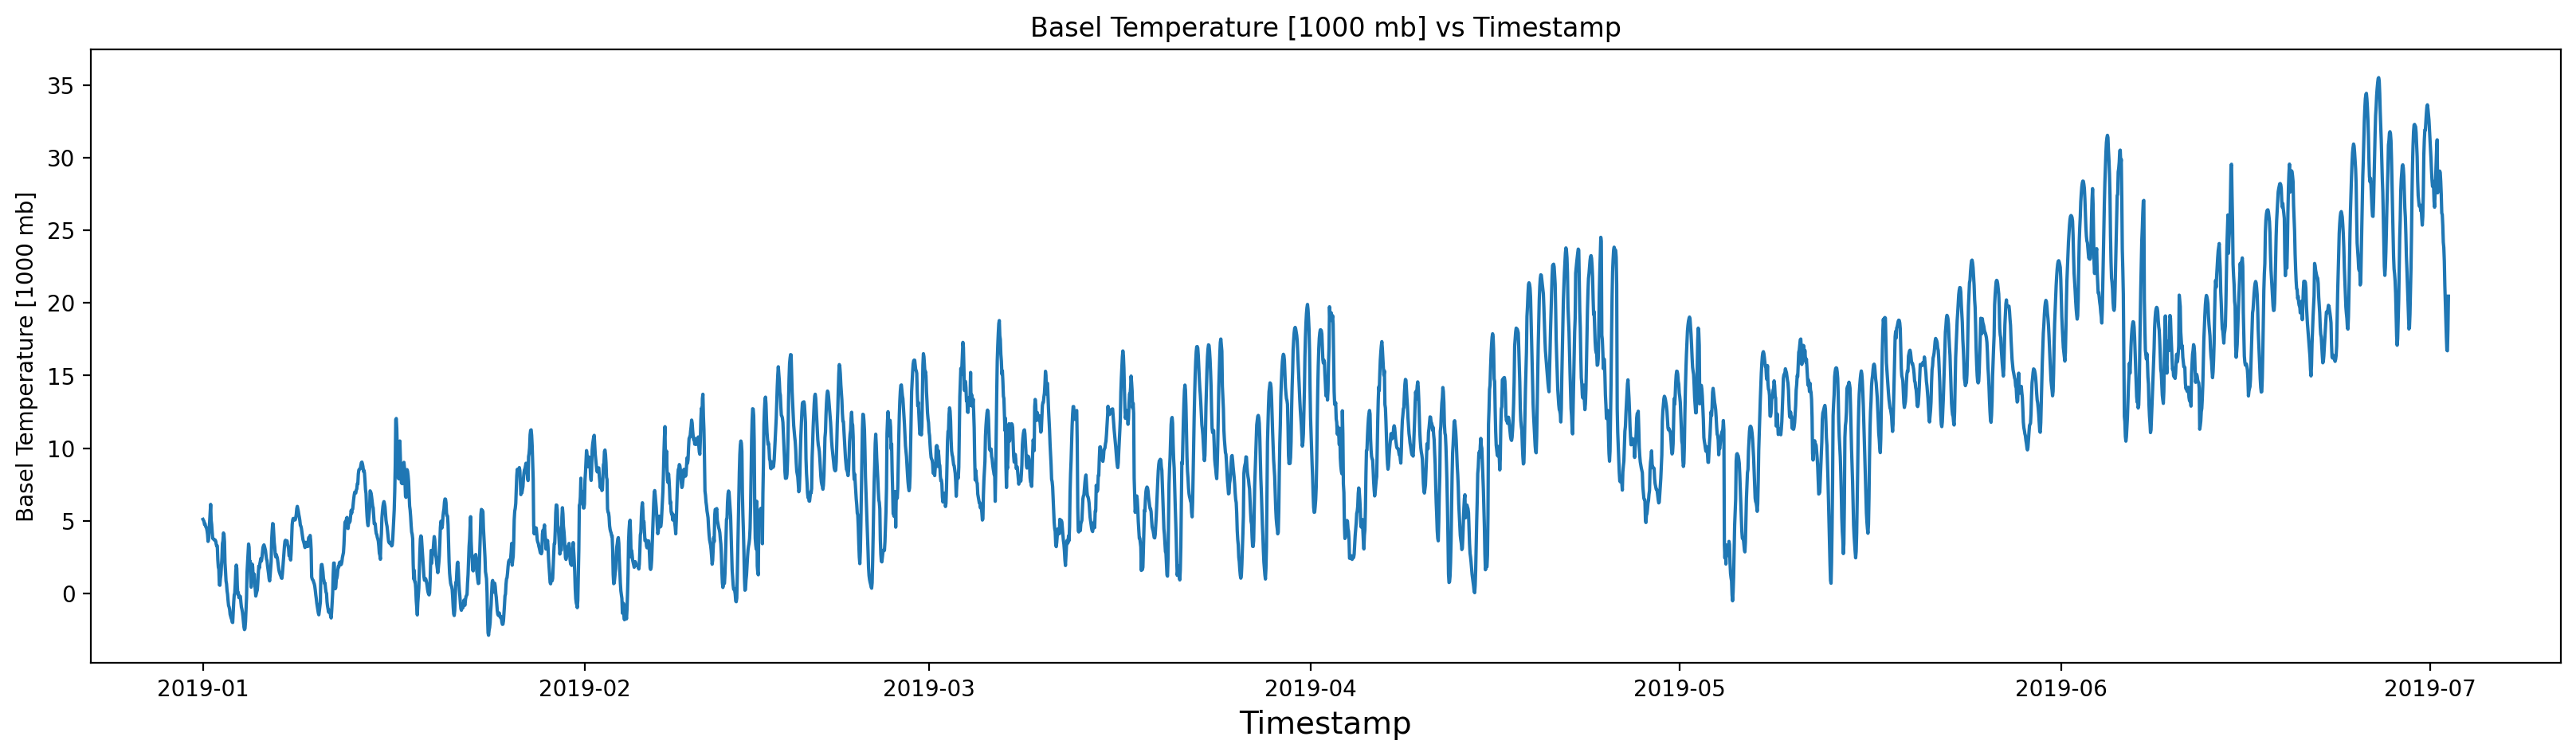

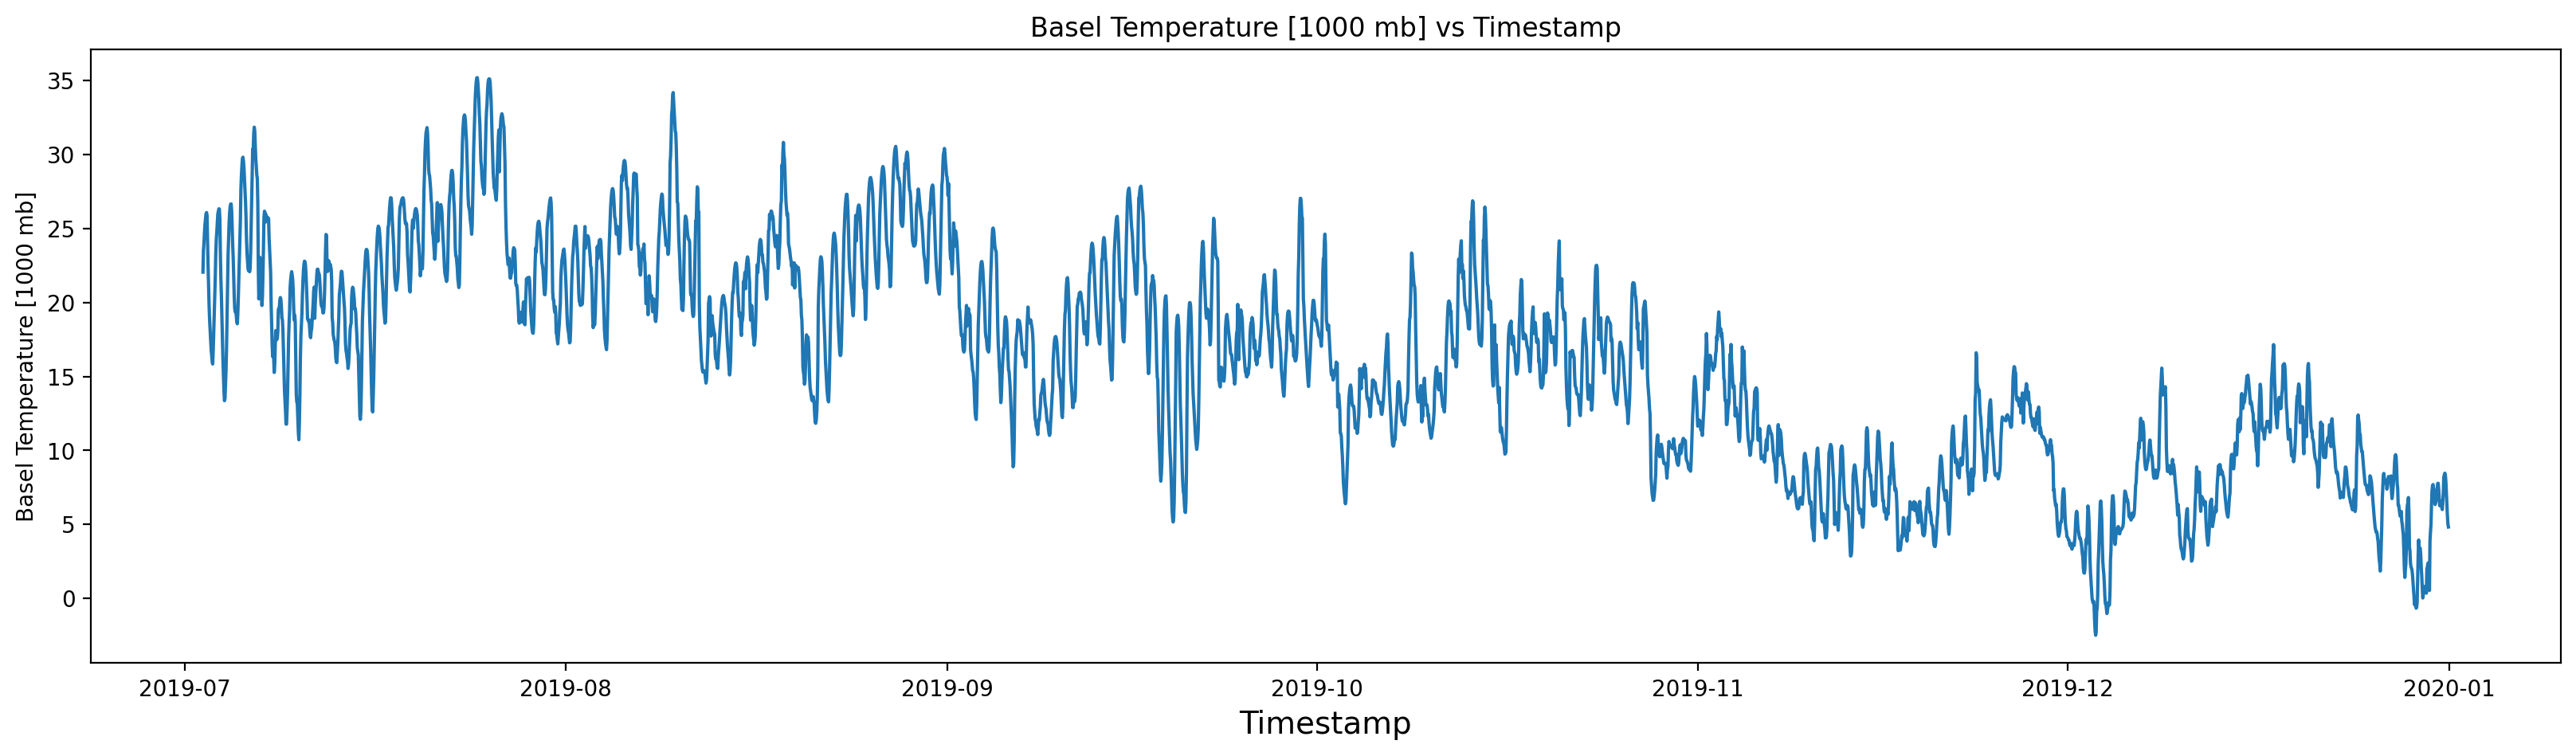

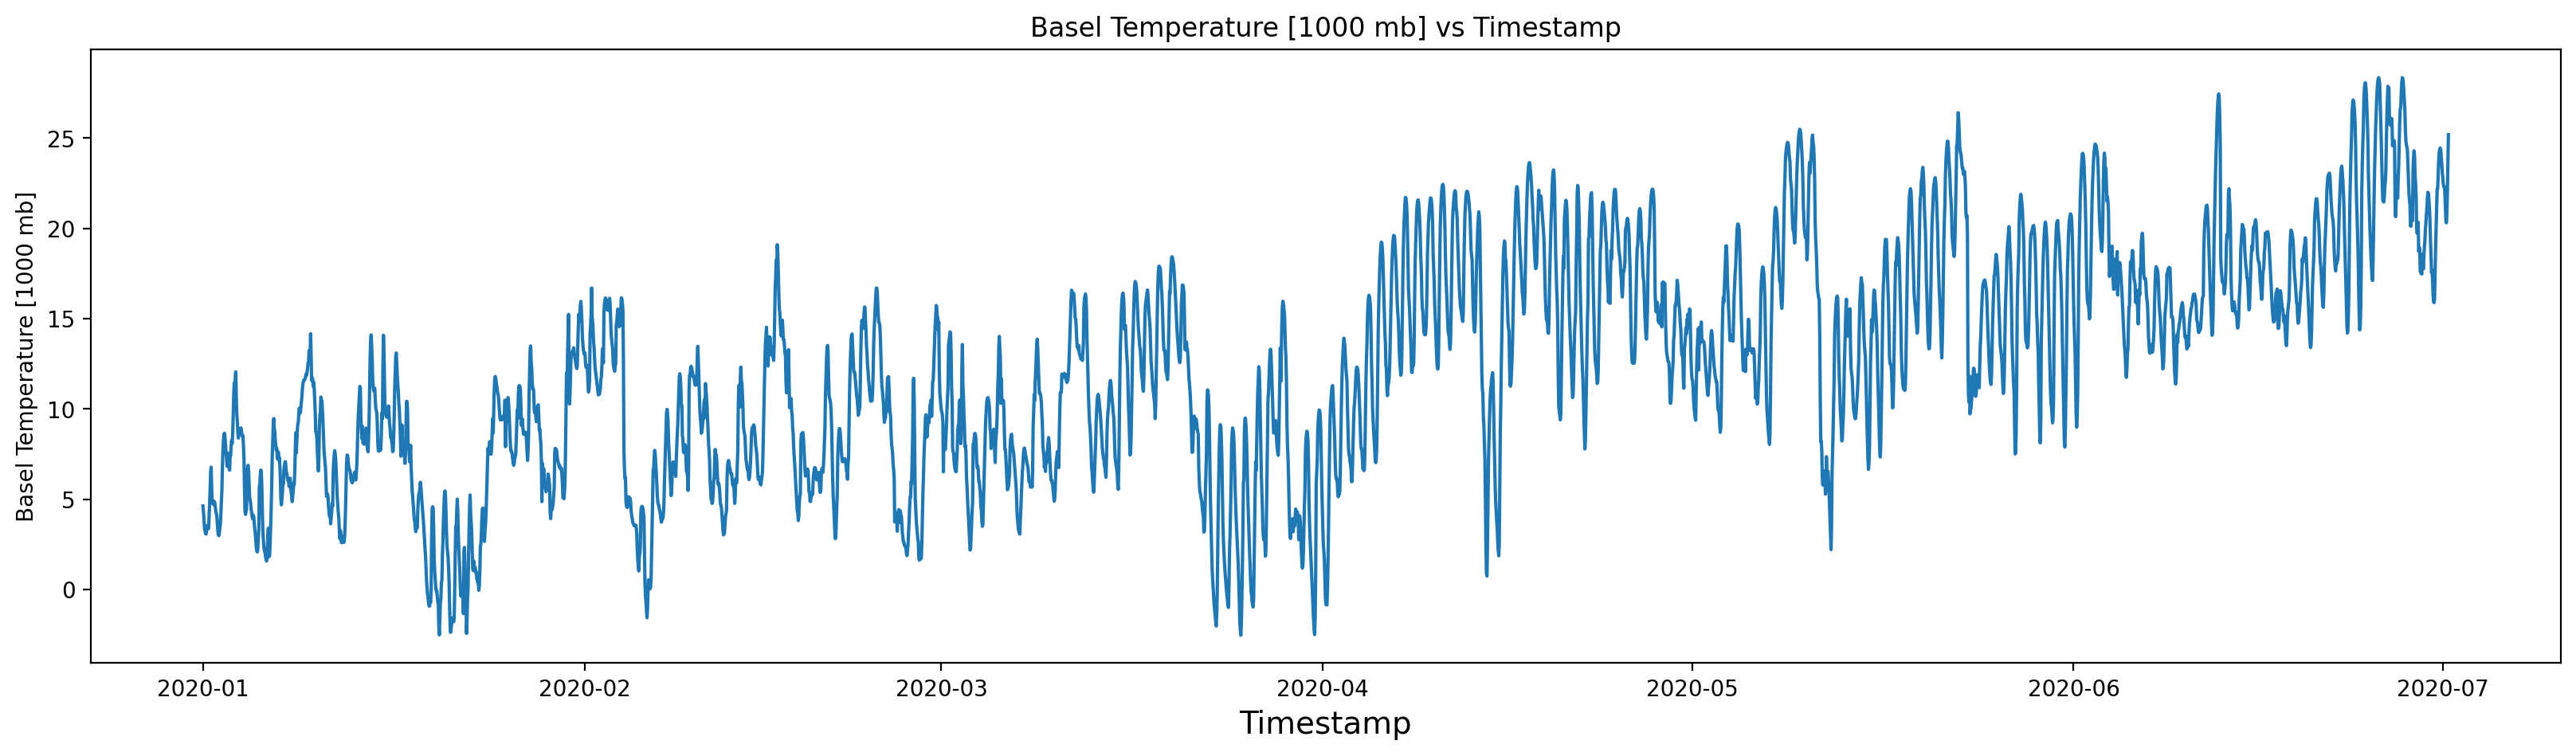

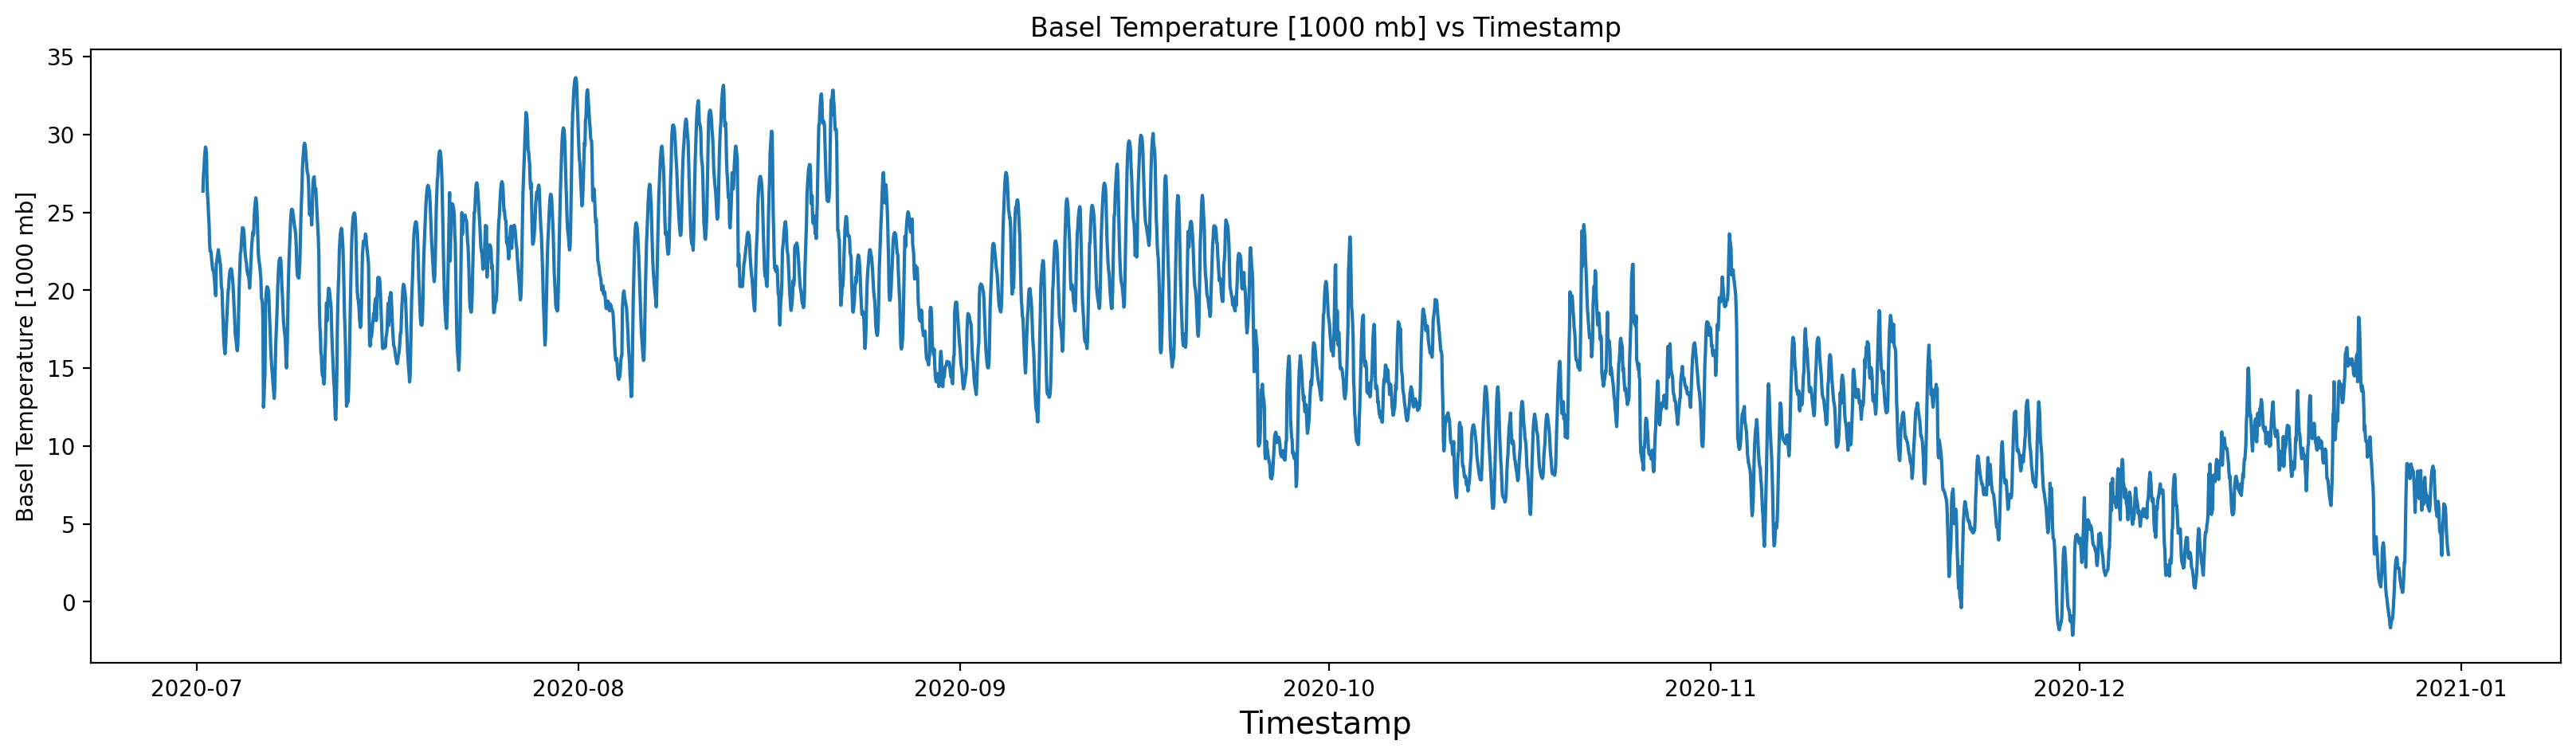

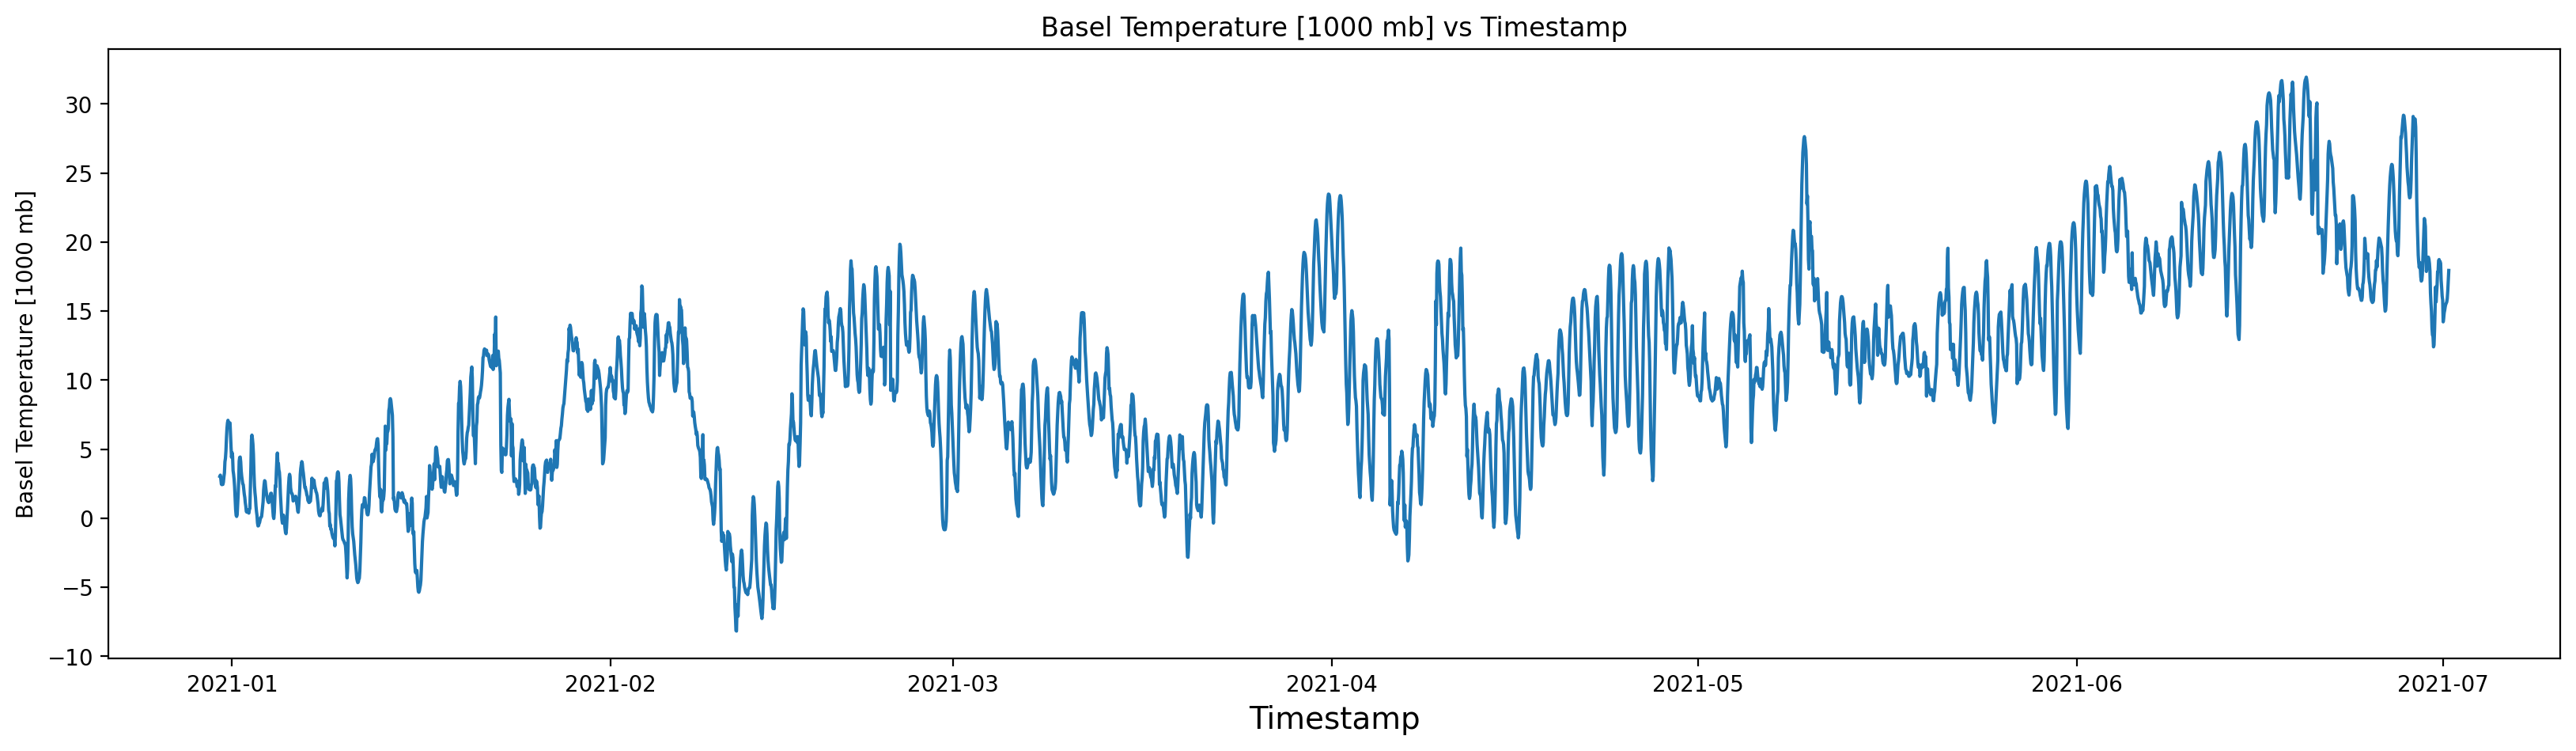

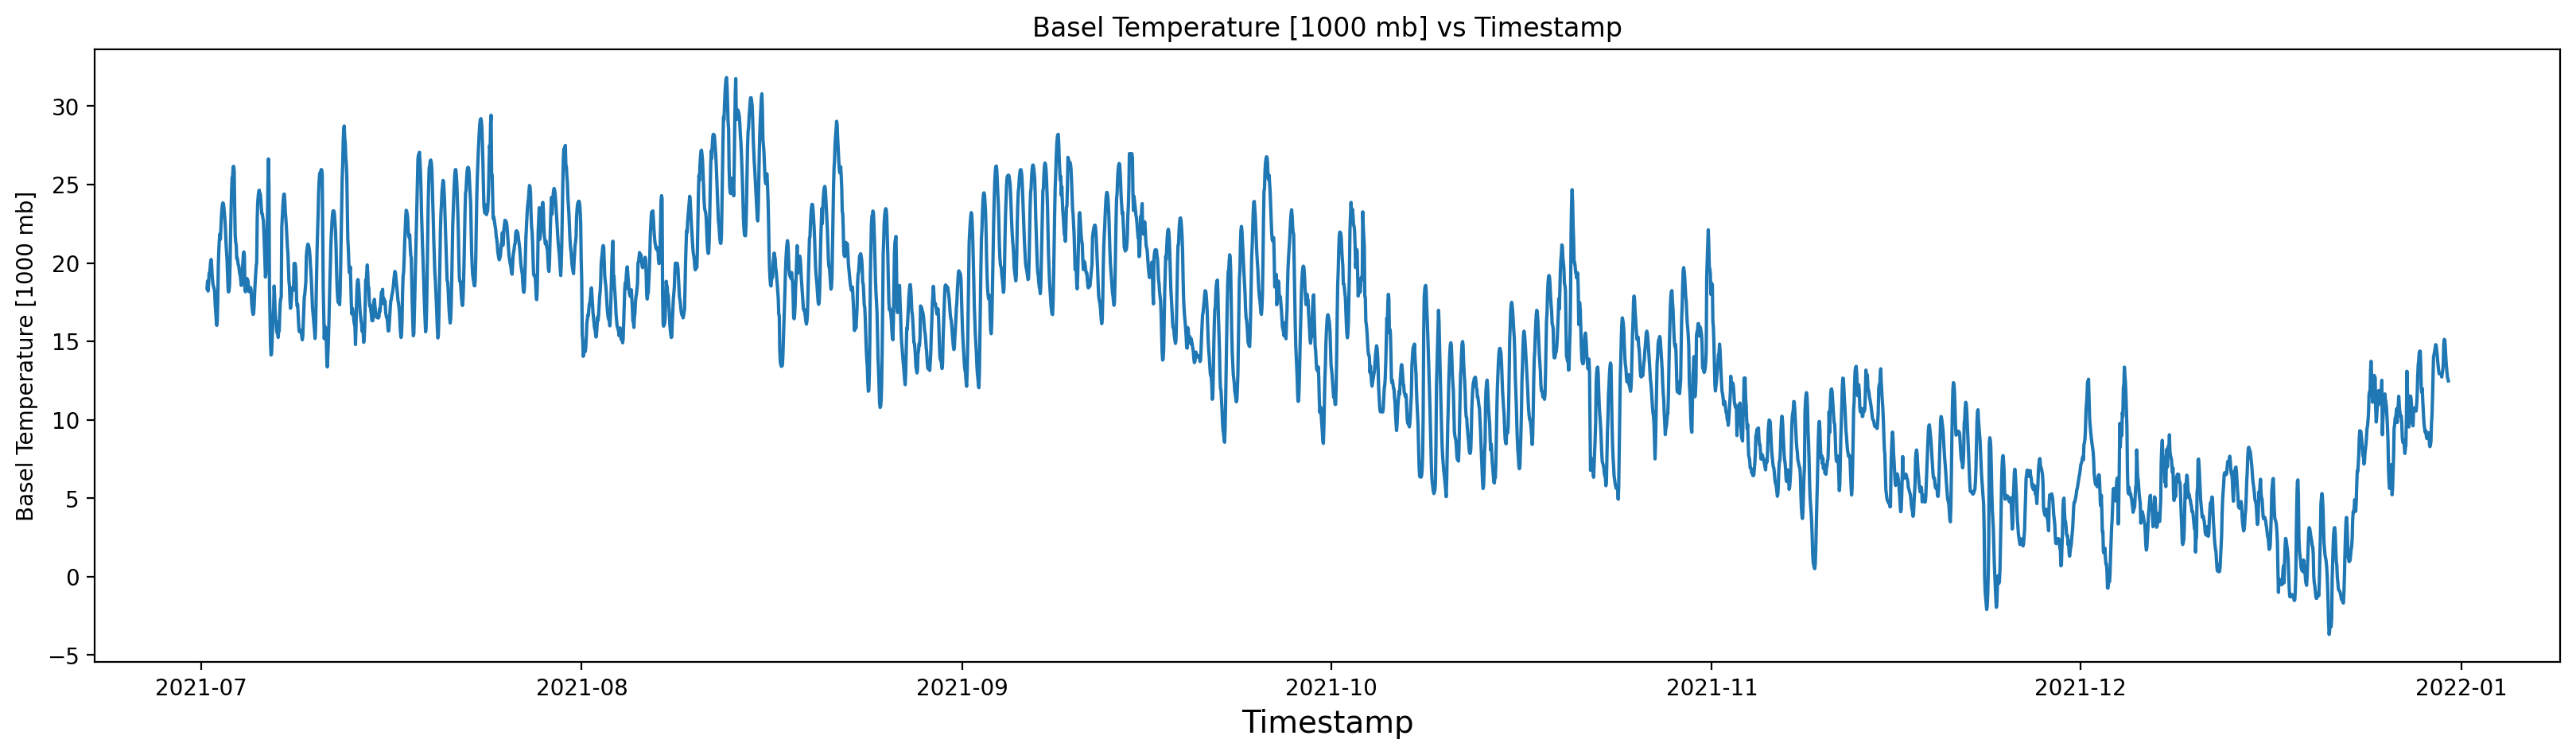

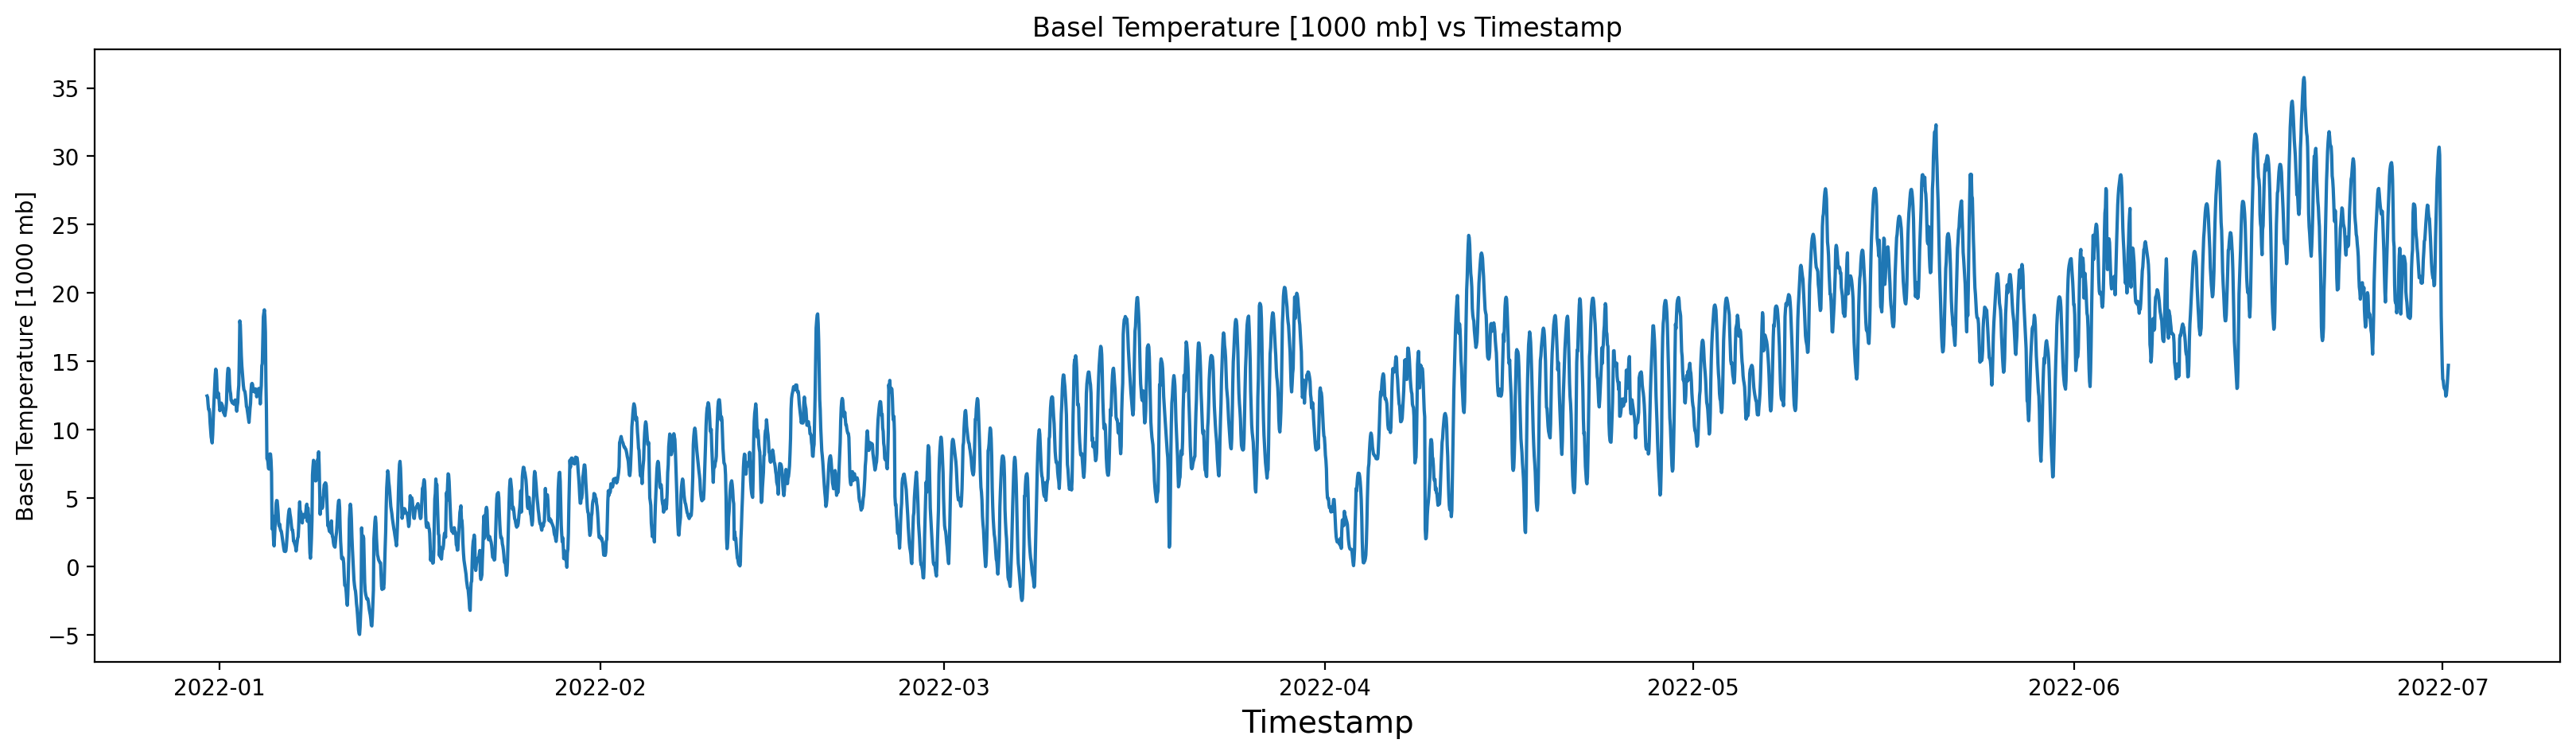

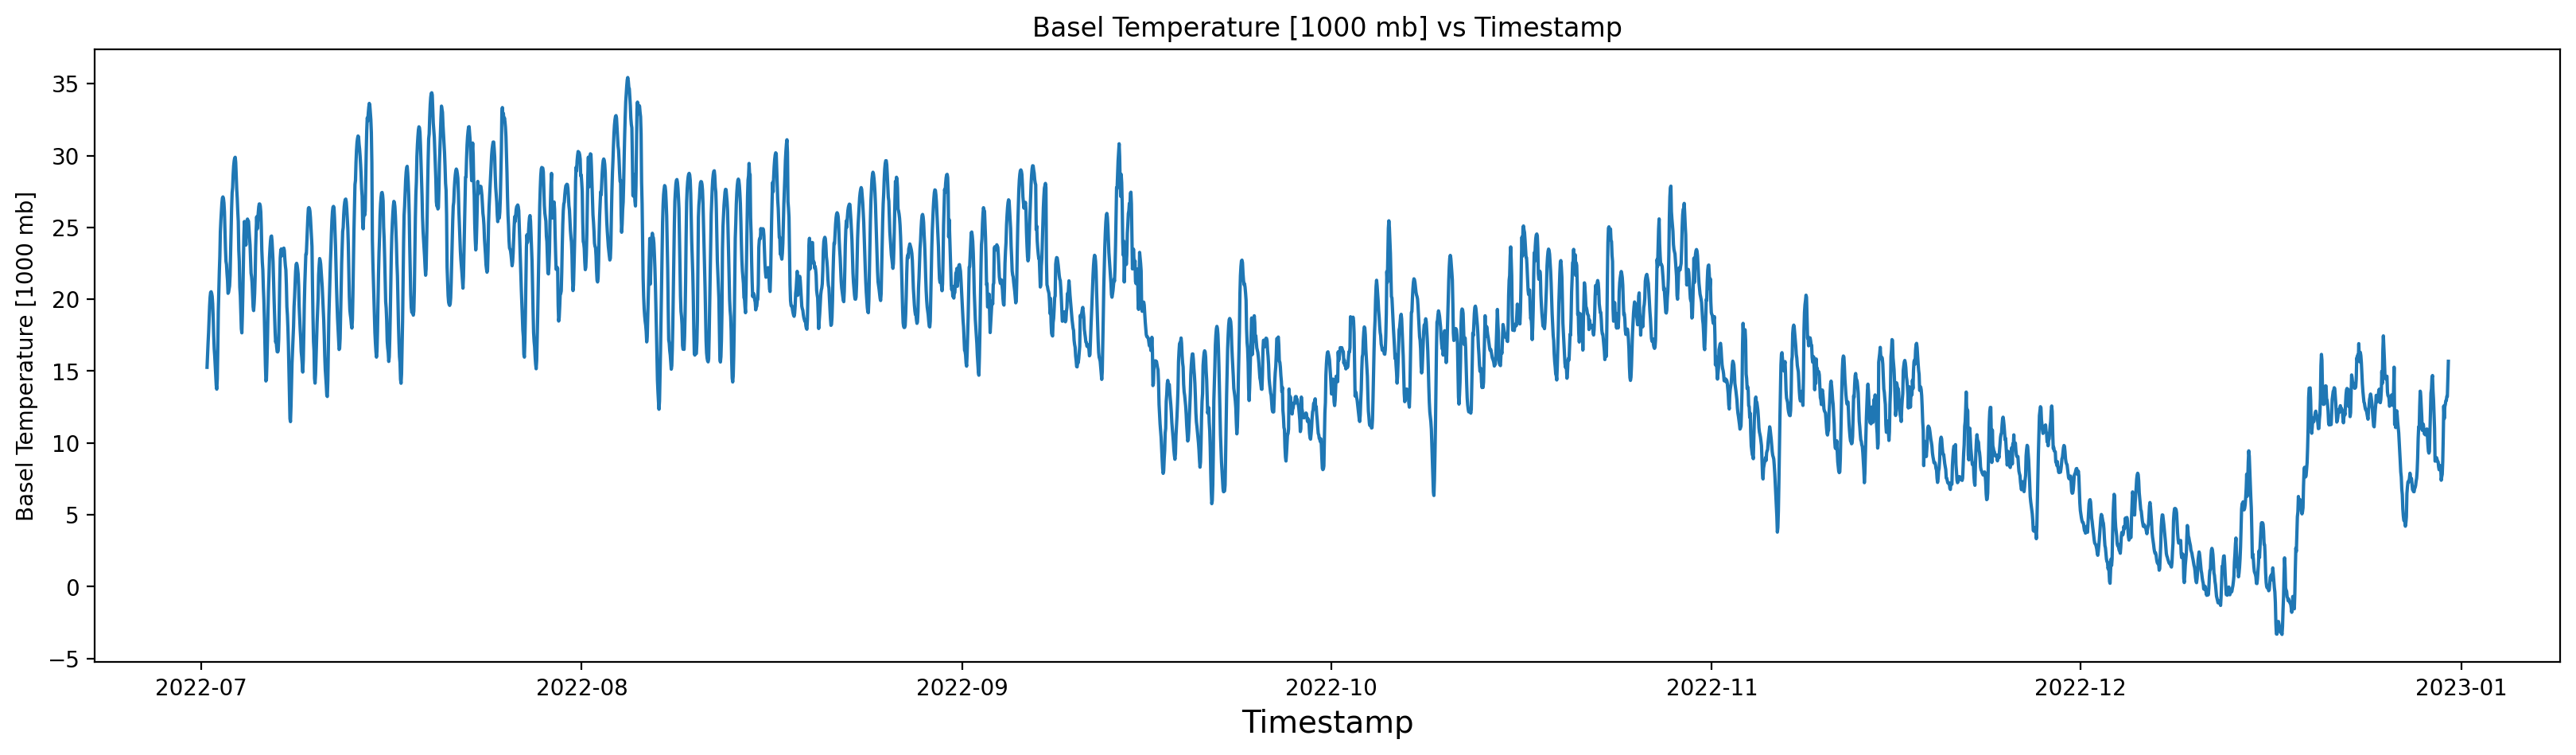

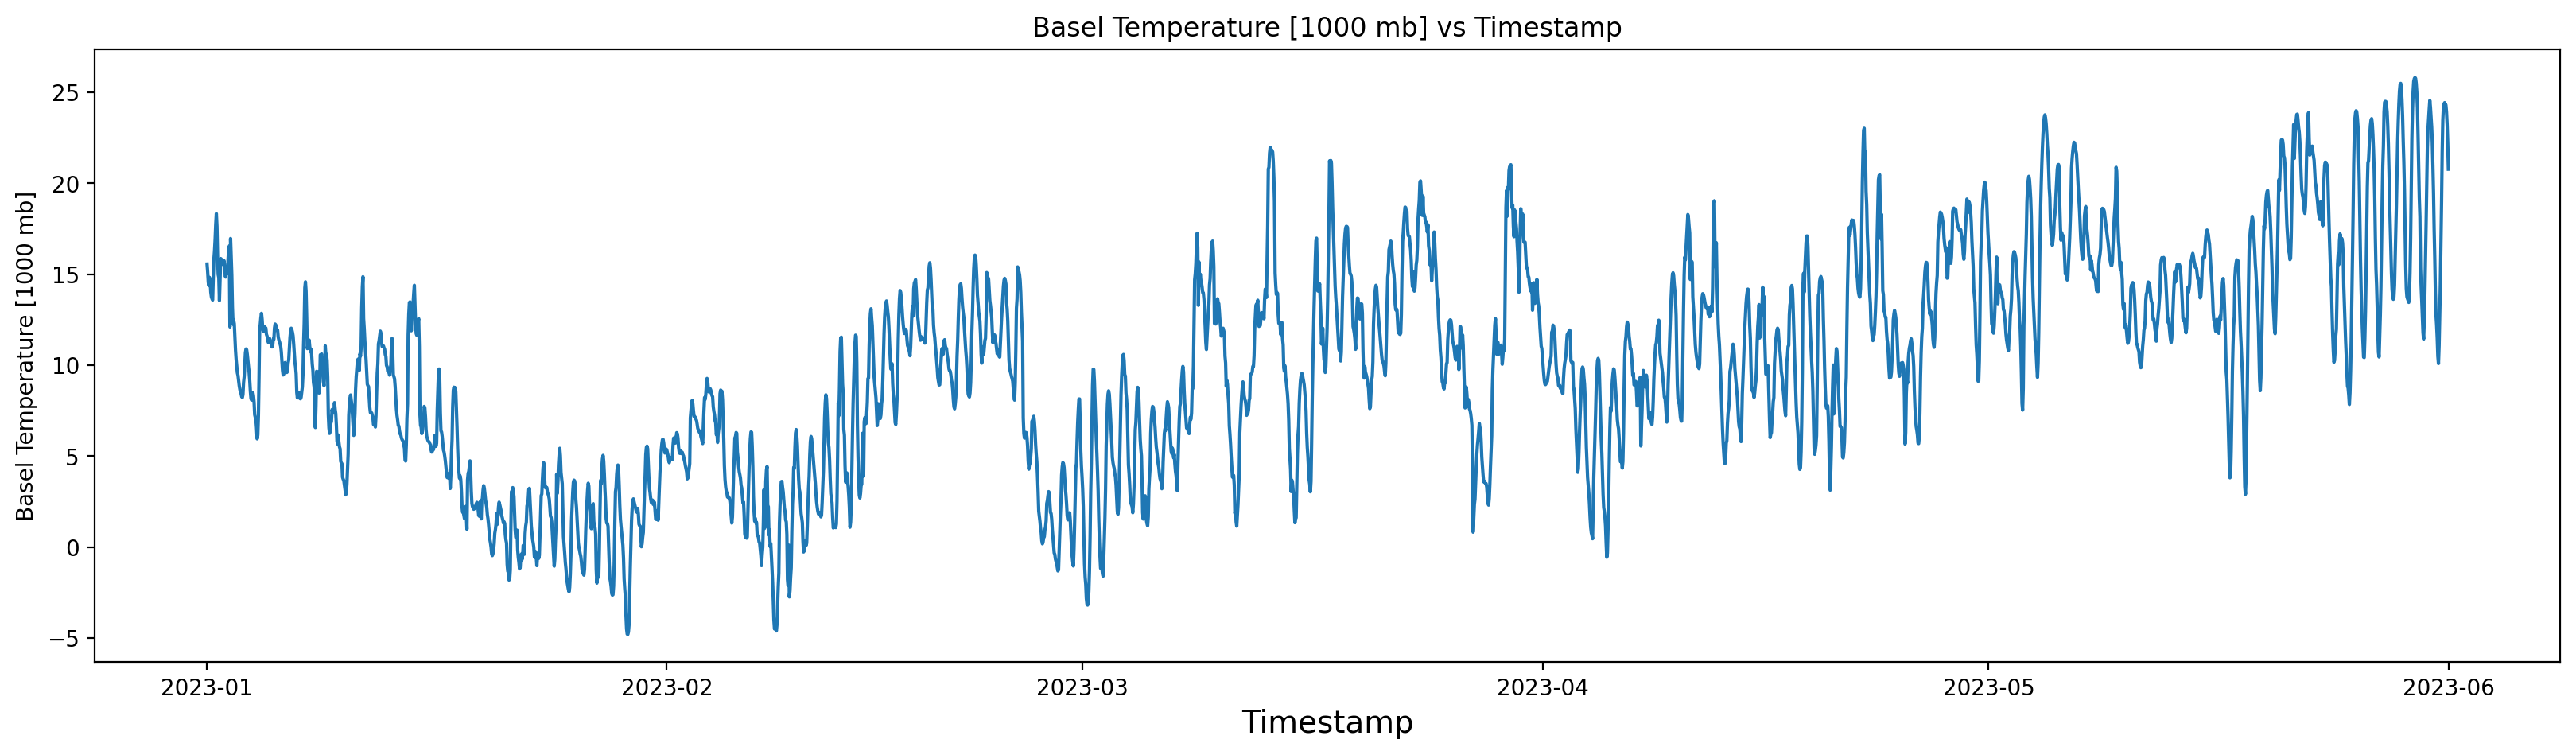

In [5]:
# Break down into separate time series graphs(period = 6 months)
num = 4380

# 1/1/2018 to 31/12/2022
for i in range(10):
    figure(figsize=(20, 5), dpi=200)
    plt.plot(df["timestamp"].iloc[i*num:(i+1)*num], df["Basel Temperature [1000 mb]"].iloc[i*num:(i+1)*num])
    plt.title("Basel Temperature [1000 mb] vs Timestamp")
    plt.xlabel("Timestamp", fontsize=14)
    plt.ylabel("Basel Temperature [1000 mb]", fontsize=10)
    plt.show()
    
# 1/1/2023 to 31/5/2023
figure(figsize=(20, 5), dpi=200)
plt.plot(df["timestamp"].iloc[43825:47448], df["Basel Temperature [1000 mb]"].iloc[43825:47448])
plt.title("Basel Temperature [1000 mb] vs Timestamp")
plt.xlabel("Timestamp", fontsize=14)
plt.ylabel("Basel Temperature [1000 mb]", fontsize=10)
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

# Extract column from DataFrame as array
data = df["Basel Temperature [1000 mb]"].values

# Normalization 
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data.reshape(-1,1))
data = normalized_data.flatten()
df['Basel Temperature [1000 mb] Normalized'] = data

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

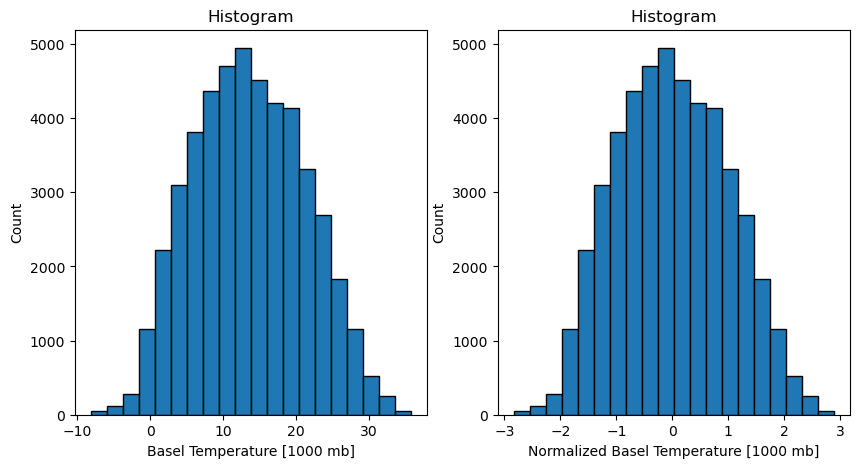

In [7]:
# Create histogram to visualize values in dataset
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title("Histogram")
plt.xlabel("Basel Temperature [1000 mb]")
plt.ylabel("Count")
plt.hist(df["Basel Temperature [1000 mb]"], edgecolor='black', bins=20)

plt.subplot(1, 2, 2)
plt.title("Histogram")
plt.xlabel("Normalized Basel Temperature [1000 mb]")
plt.ylabel("Count")
plt.hist(data, edgecolor='black', bins=20)
plt.show()

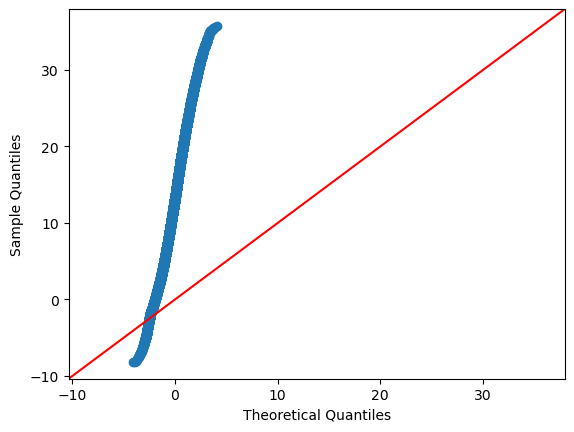

In [8]:
import statsmodels.api as sm

# Create Q-Q plot
fig = sm.qqplot(df['Basel Temperature [1000 mb]'], line='45')
plt.show()

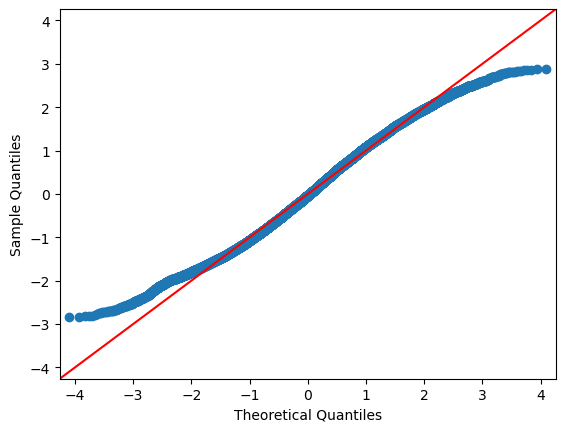

In [9]:
## qqplot on normalized data
fig = sm.qqplot(data, line='45')
plt.show()

In [10]:
from scipy.stats import anderson

result = (anderson(df['Basel Temperature [1000 mb]'], dist='norm'))
print("AD statistic:", result[0])
print("Critical values:", result[1])
print("Significance levels:",result[2])

# Outcome of normality test
# Significance of 0.05
print("\nInterpretation:")
if result[0] < result[1][2]:
    print("Failed to reject null hypothesis, Normal Distribution")
else:
    print("Reject null hypothesis, Non-normal Distribution")

AD statistic: 88.91336205394327
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]

Interpretation:
Reject null hypothesis, Non-normal Distribution


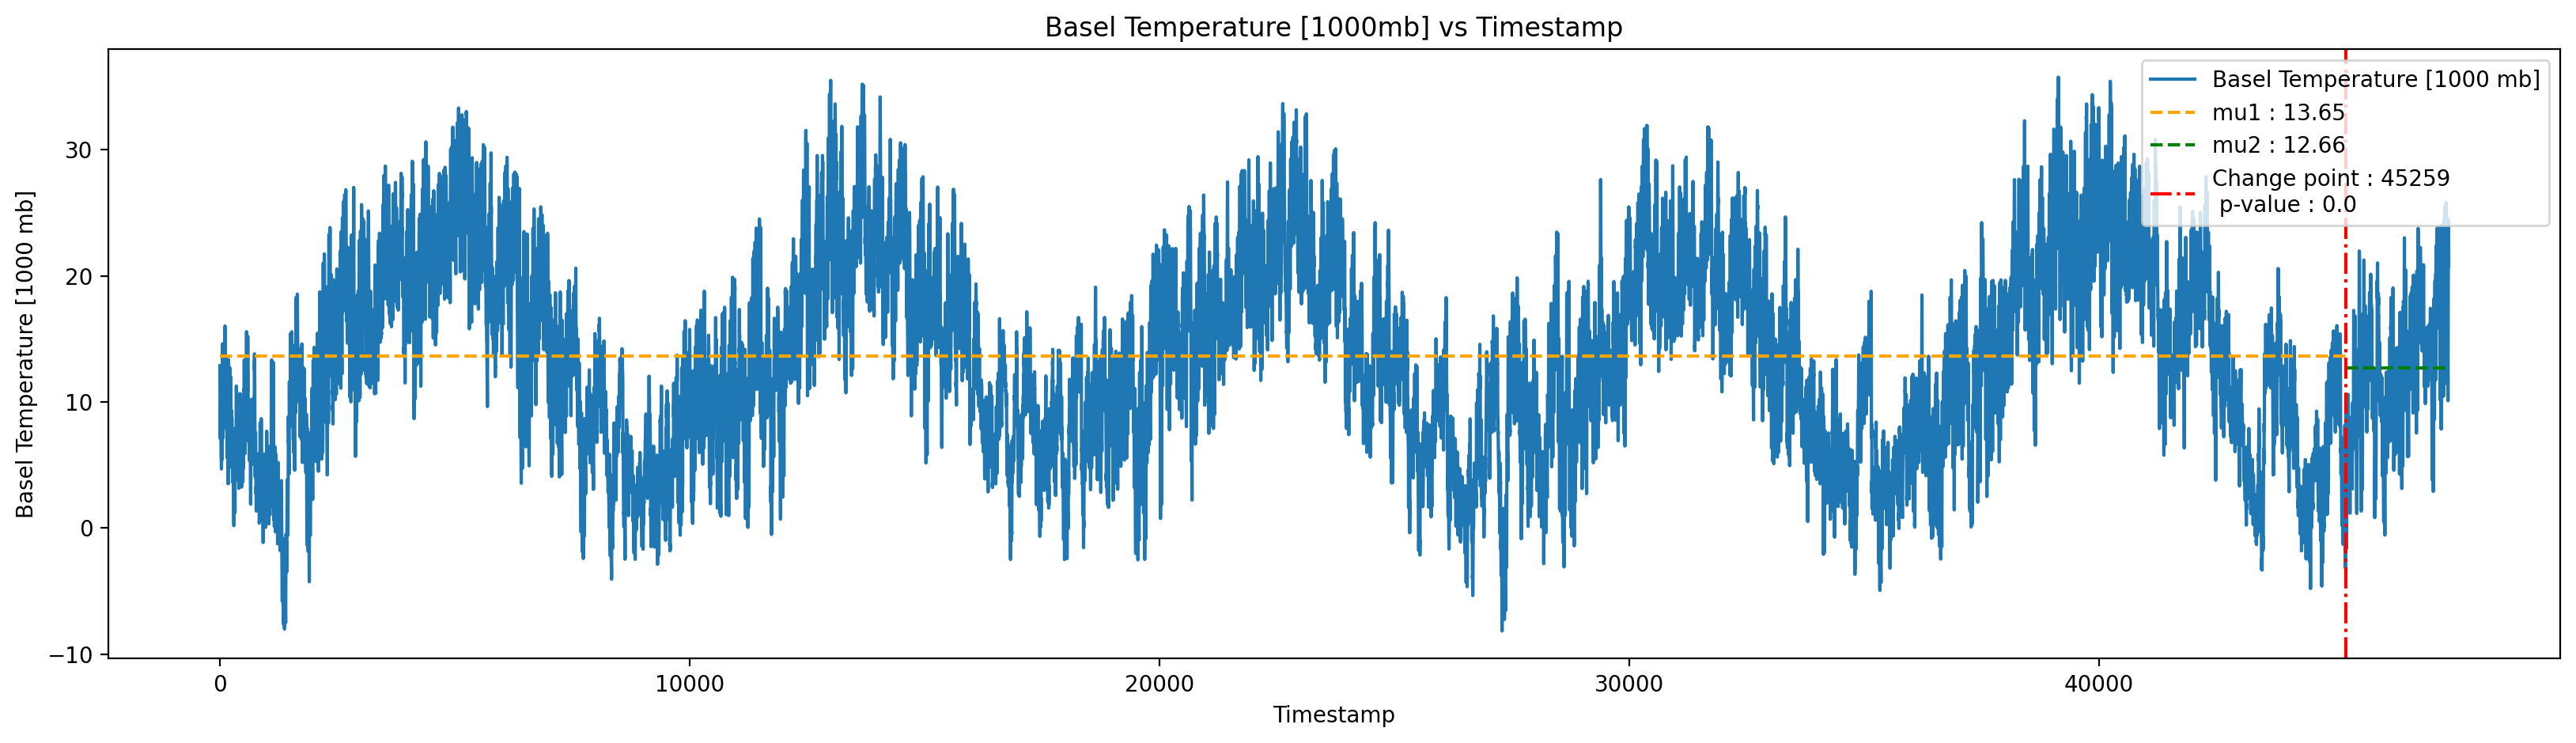

In [11]:
import pyhomogeneity as hg
# Pettitt Test (Homogeneity)
result = hg.pettitt_test(df['Basel Temperature [1000 mb]'])
mn = 0
mx = len(data)
loc = result.cp
mu1 = result.avg.mu1
mu2 = result.avg.mu2

# Plot the probable change point
plt.figure(figsize=(20, 5), dpi=200)
plt.plot(df['Basel Temperature [1000 mb]'], label=df.columns[1])
plt.hlines(mu1, xmin=mn, xmax=loc, linestyles="--", colors="orange",lw=1.5, label="mu1 : " + str(round(mu1,2)))
plt.hlines(mu2, xmin=loc, xmax=mx, linestyles="--", colors="g", lw=1.5, label="mu2 : " + str(round(mu2,2)))
plt.axvline(x=loc, linestyle="-." , color="red", lw=1.5, label="Change point : "+ str(loc) + "\n p-value : " + str(result.p))
plt.title('Basel Temperature [1000mb] vs Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Basel Temperature [1000 mb]')
plt.legend(loc='upper right')

In [12]:
# Outcome of homogeneity test
if result.h:
    print("The time series data is non-homogenous")
else:    
    print("The time series data is homogenous")

The time series data is non-homogenous


In [13]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# Perform the stationarity check using the augmented Dicky-Fuller test
result = adfuller(df['Basel Temperature [1000 mb]'])
print("ADF Statistic: ", result[0])
print("P-value: ", result[1])
print("Critical values: ")
#Key represent the significance level and value represents the corresponding critical value
for key, value in result[4].items():
    print(f"{key}: {value}")
    
# Perform Stationarity check using KPSS test
result = kpss(df['Basel Temperature [1000 mb]'], regression='ct', nlags='auto')
print("\n\nKPSS Statistic: ", result[0])
print("P-value: ", result[1])
print("Critical values: ")
#Key represent the significance level and value represents the corresponding critical value
for key, value in result[3].items():
    print(f"{key}: {value}")
    
# Conclusion 
print("\nInterpretation:")
if result[1] < 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Strong evidence against the alternative hypothesis, failed to reject the null hypothesis. Data has unit root and is non-stationary")

ADF Statistic:  -8.368842860923758
P-value:  2.6964993962725936e-13
Critical values: 
1%: -3.4304879965023236
5%: -2.861600991545929
10%: -2.566802463795613


KPSS Statistic:  0.31793136301967395
P-value:  0.01
Critical values: 
10%: 0.119
5%: 0.146
2.5%: 0.176
1%: 0.216

Interpretation:
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


C:\Users\langk\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


C:\Users\langk\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


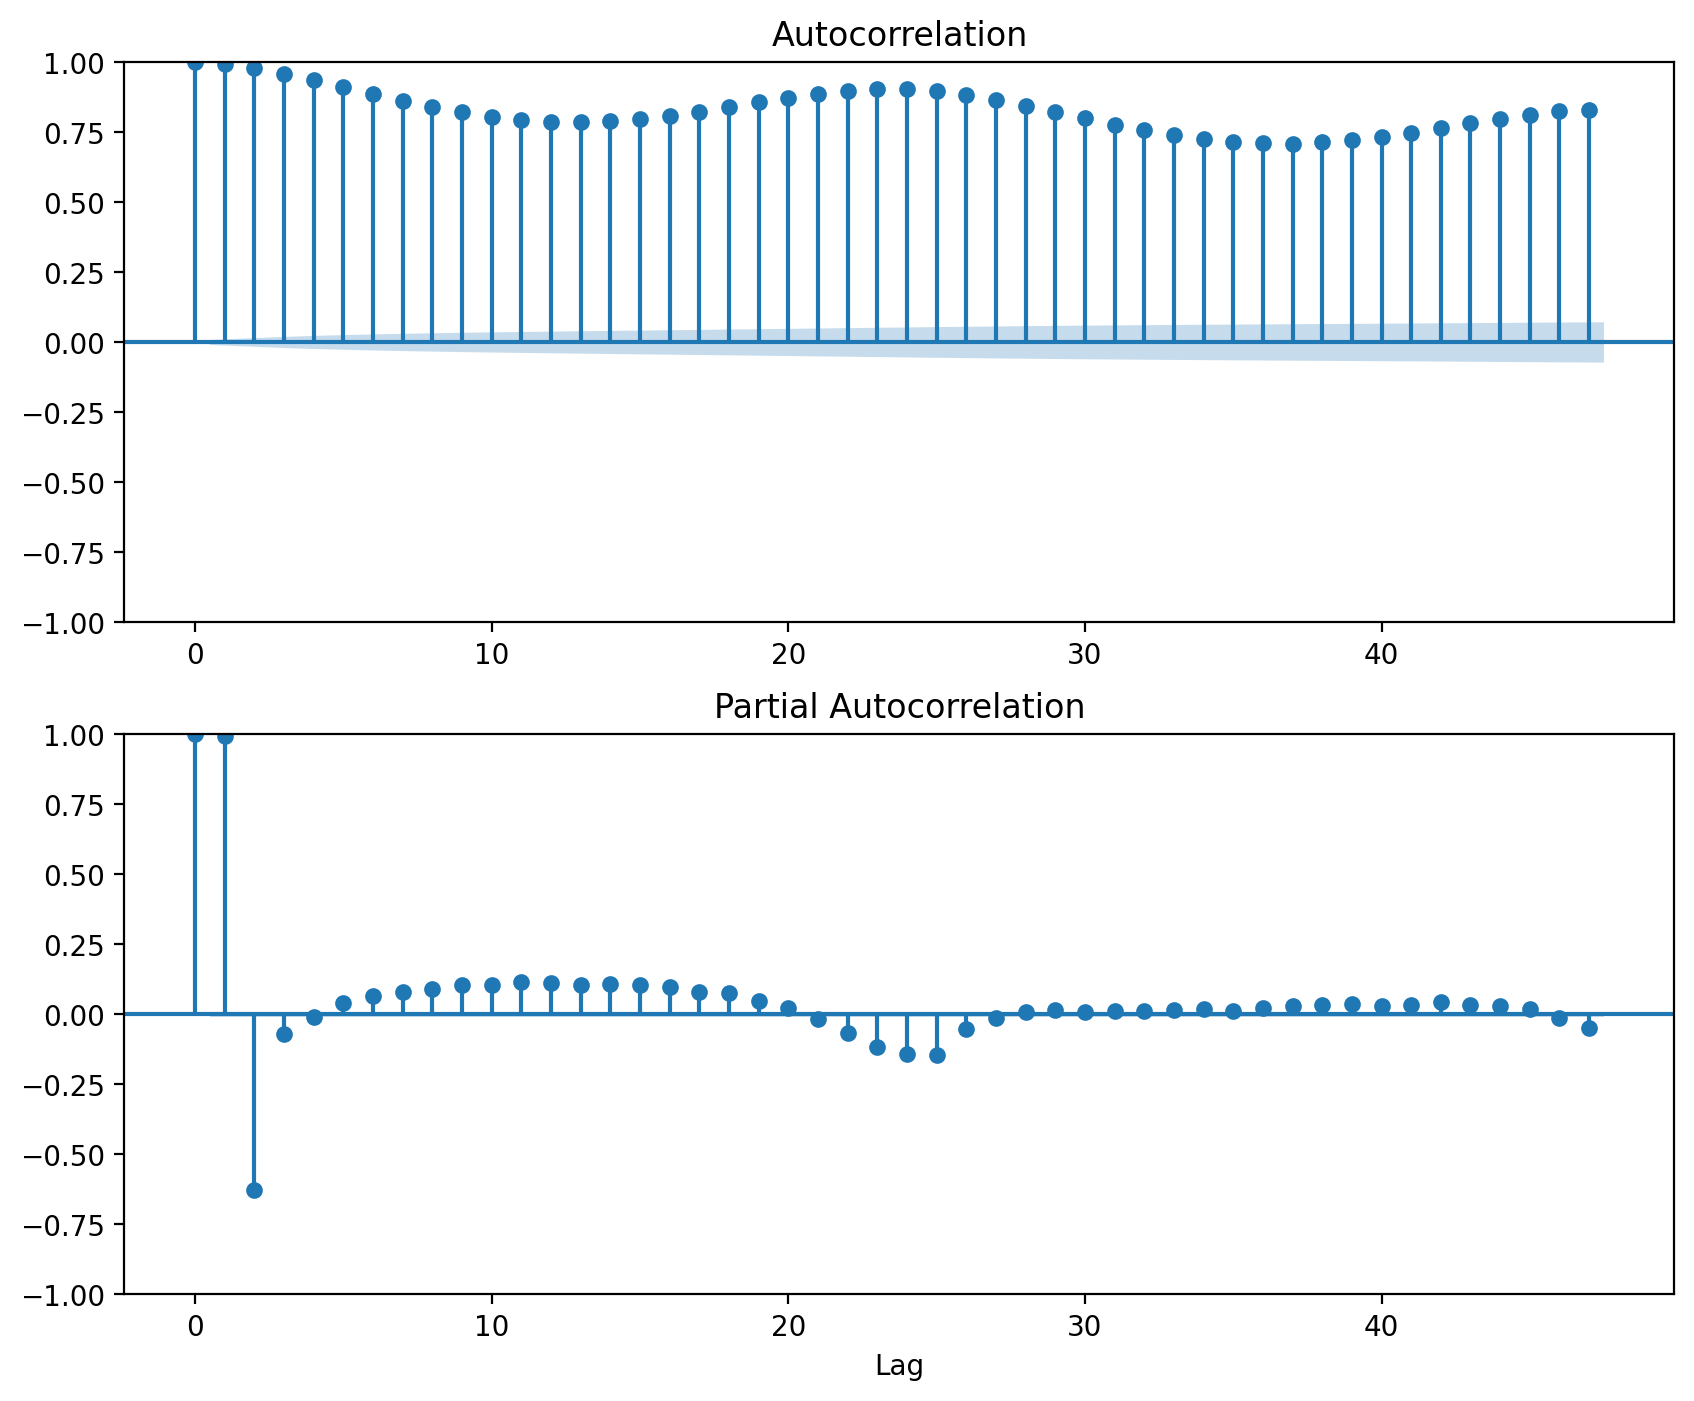

In [14]:
# Plot the ACF and PACF for the time series sequence analysis
fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), dpi=200)
sm.graphics.tsa.plot_acf(data, ax=ax1, alpha=0.05)
sm.graphics.tsa.plot_pacf(data, ax=ax2, alpha=0.05)
plt.xlabel('Lag')
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

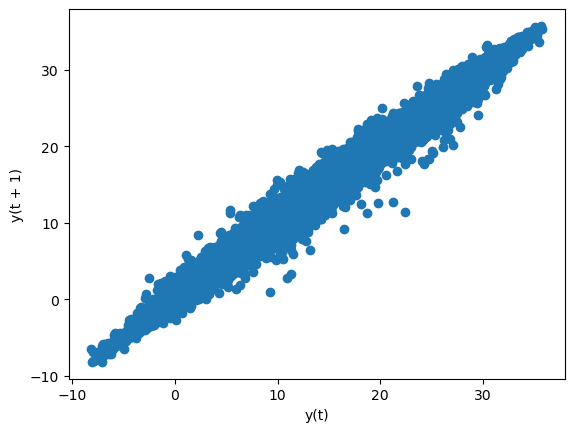

In [15]:
# Lag scatter plot
pd.plotting.lag_plot(df["Basel Temperature [1000 mb]"], lag=1) # 1 hour lags

## The points are spread through a line pattern from bottom left to the upper right corner
## It suggest the datapoints have strong positive correlations.
## Some random datapoints that lies outside the line pattern means weaker correlations. 

Text(0.5, 0, 'Timestamp')

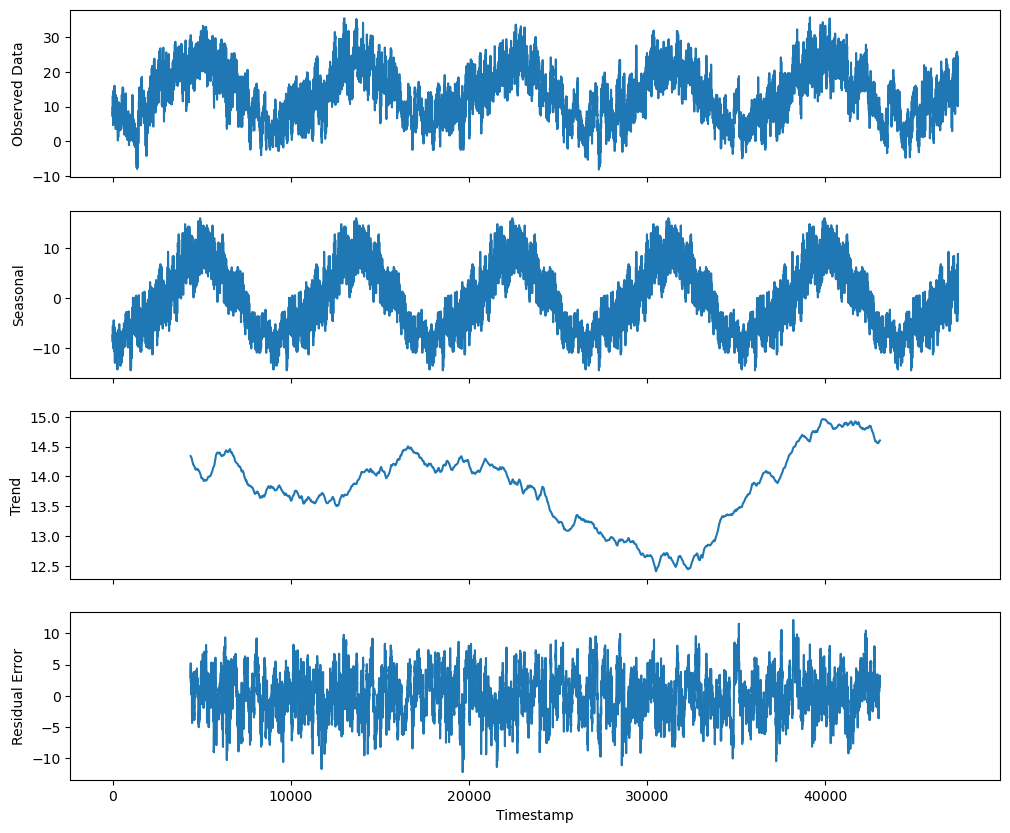

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform seasonal decomposition(additive)
result = seasonal_decompose(df['Basel Temperature [1000 mb]'], model='additive', period=24*365)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed Data')
result.seasonal.plot(ax=ax2)
ax2.set_ylabel('Seasonal')
result.trend.plot(ax=ax3)
ax3.set_ylabel('Trend')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual Error')
plt.xlabel("Timestamp")

## ** In this case we cant do seasonal decomposition through multiplicative due to the existence of negative values in entries

In [17]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

# Try Exponential smoothing (ETS model)
ets_data = pd.Series(df['Basel Temperature [1000 mb] Normalized']).astype('float64')
ets_model = ETSModel(ets_data, error='add', trend='add', seasonal = 'add', 
                     damped_trend=False, seasonal_periods=4, 
                     initial_level=ets_data.values.mean())
ets_fit = ets_model.fit()
ets_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           ETS Results                                            
==================================================================================================
Dep. Variable:     Basel Temperature [1000 mb] Normalized   No. Observations:                47448
Model:                                           ETS(AAA)   Log Likelihood               36446.388
Date:                                    Thu, 15 Jun 2023   AIC                         -72872.776
Time:                                            18:28:15   BIC                         -72785.102
Sample:                                                 0   HQIC                        -72845.246
                                                  - 47448   Scale                            0.013
Covariance Type:                                   approx                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.9999      0.004    227.080      0.000       0.991       1.009
smoothing_trend     9.999e-05        nan        nan        nan         nan         nan
smoothing_seasonal  1.824e-05        nan        nan        nan         nan         nan
initial_level         -0.0949        nan        nan        nan         nan         nan
initial_trend       9.771e-06      0.002      0.006      0.995      -0.003       0.003
initial_seasonal.0     0.0009        nan        nan        nan         nan         nan
initial_seasonal.1    -0.0021        nan        nan        nan         nan         nan
initial_seasonal.2    -0.0020        nan        nan        nan         nan         nan
initial_seasonal.3          0        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                    35462.49   Jarque-Bera (JB):             39044.97
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [18]:
# Make predictions on the test set
pred_ets = ets_fit.predict(start=len(train_data), end=len(data) - 1)

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluate the model
mse = mean_squared_error(test_data, pred_ets)
mae = mean_absolute_error(test_data, pred_ets)

# Print evaluation metrics
print("ETS model performance metrics")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

ETS model performance metrics
Mean Squared Error (MSE): 0.013140577203970357
Mean Absolute Error (MAE): 0.0846190703591701


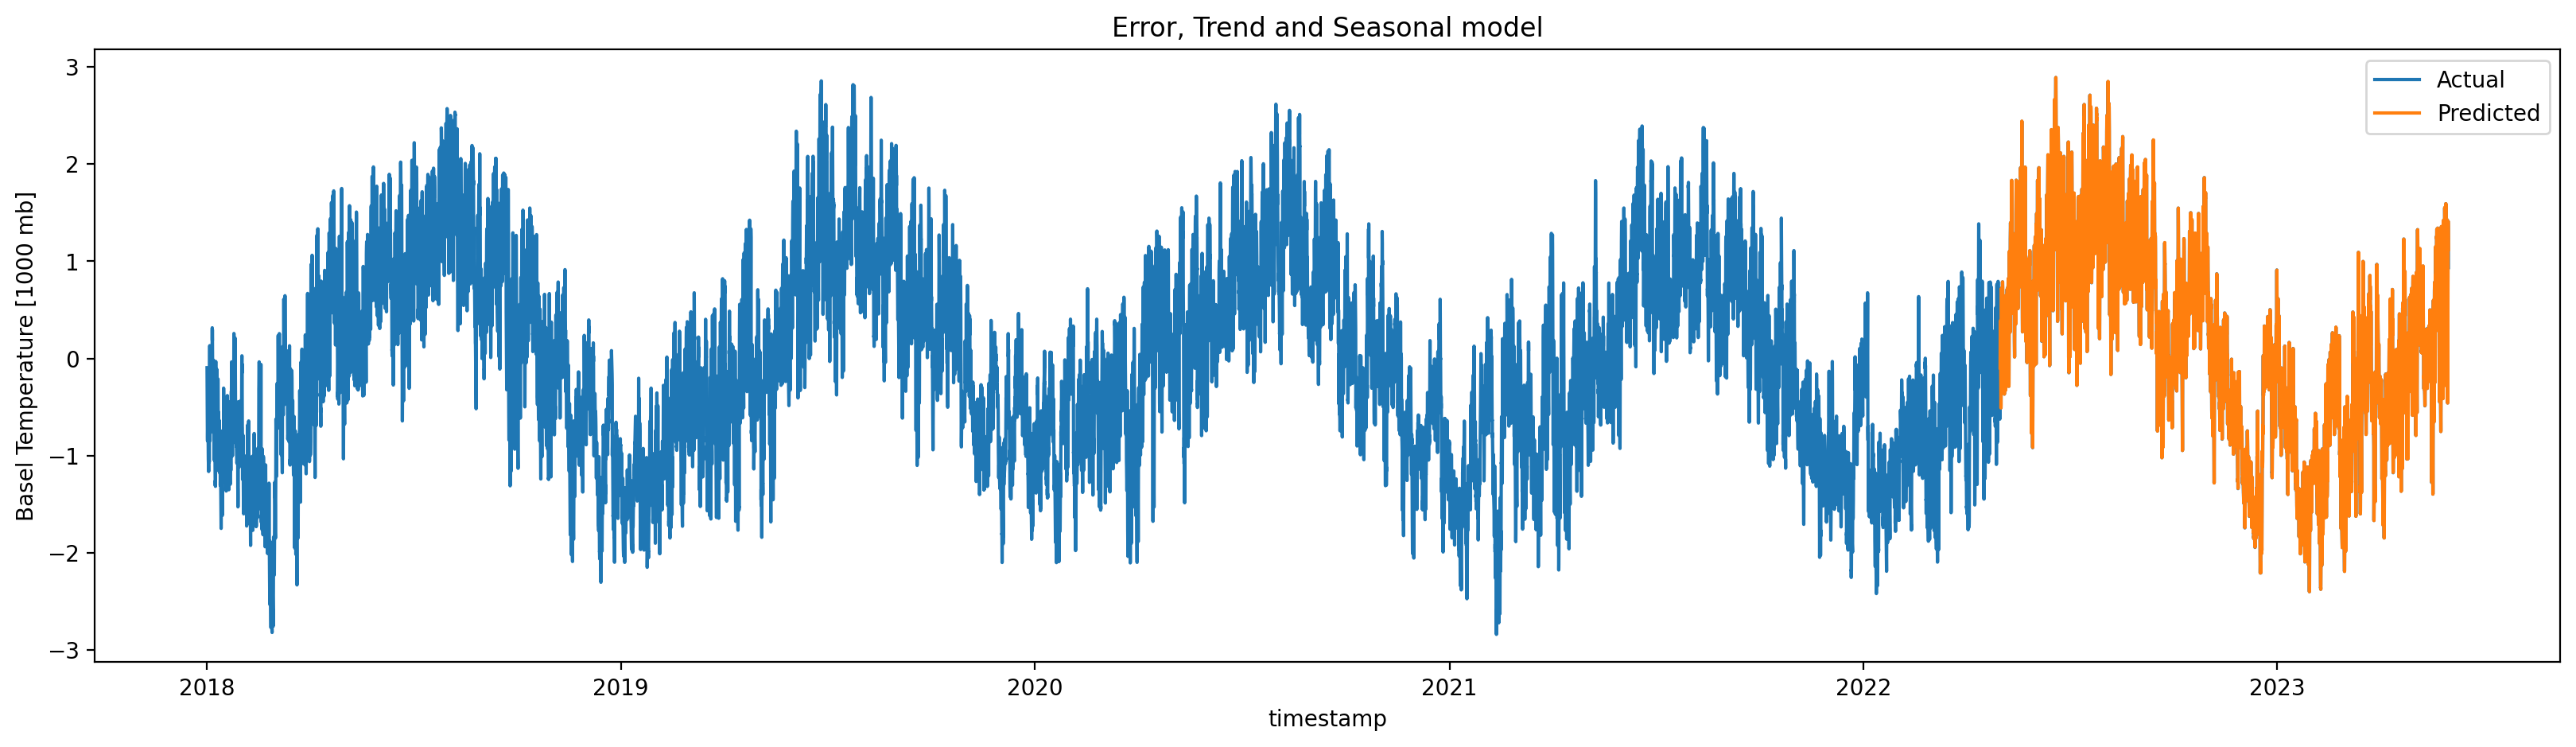

In [19]:
# Create the hours for the x-axis
hours = np.array(df["timestamp"])

# Plot the actual values and predictions
plt.figure(figsize=(20,5), dpi=200)
plt.plot(hours, data, label="Actual")
plt.plot(hours[len(train_data):], pred_ets, label="Predicted")
plt.title("Error, Trend and Seasonal model")
plt.xlabel("timestamp")
plt.ylabel("Basel Temperature [1000 mb]")
plt.legend()
plt.show()

In [20]:
from statsmodels.tsa.ar_model import AutoReg

# Setting AR model
lag_order = 2 # p=2
model = AutoReg(data, lags=lag_order)

# Fit the model
ar_fit = model.fit()
print(f"Akaike information criterion (AIC): {ar_fit.aic}\nHannan–Quinn information criterion (HQC): {ar_fit.hqic}\nBayesian information criterion (BIC): {ar_fit.bic}")

# Make predictions on the test set
pred_ar = ar_fit.predict(start=len(train_data), end=len(data) - 1)

Akaike information criterion (AIC): -96453.97430210483
Hannan–Quinn information criterion (HQC): -96442.96215670508
Bayesian information criterion (BIC): -96418.90491209994


In [21]:
# Evaluate the model
mse = mean_squared_error(test_data, pred_ar)
mae = mean_absolute_error(test_data, pred_ar)

# Print evaluation metrics
print("AR model performance metrics")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

AR model performance metrics
Mean Squared Error (MSE): 0.007766430387752534
Mean Absolute Error (MAE): 0.059031670157997776


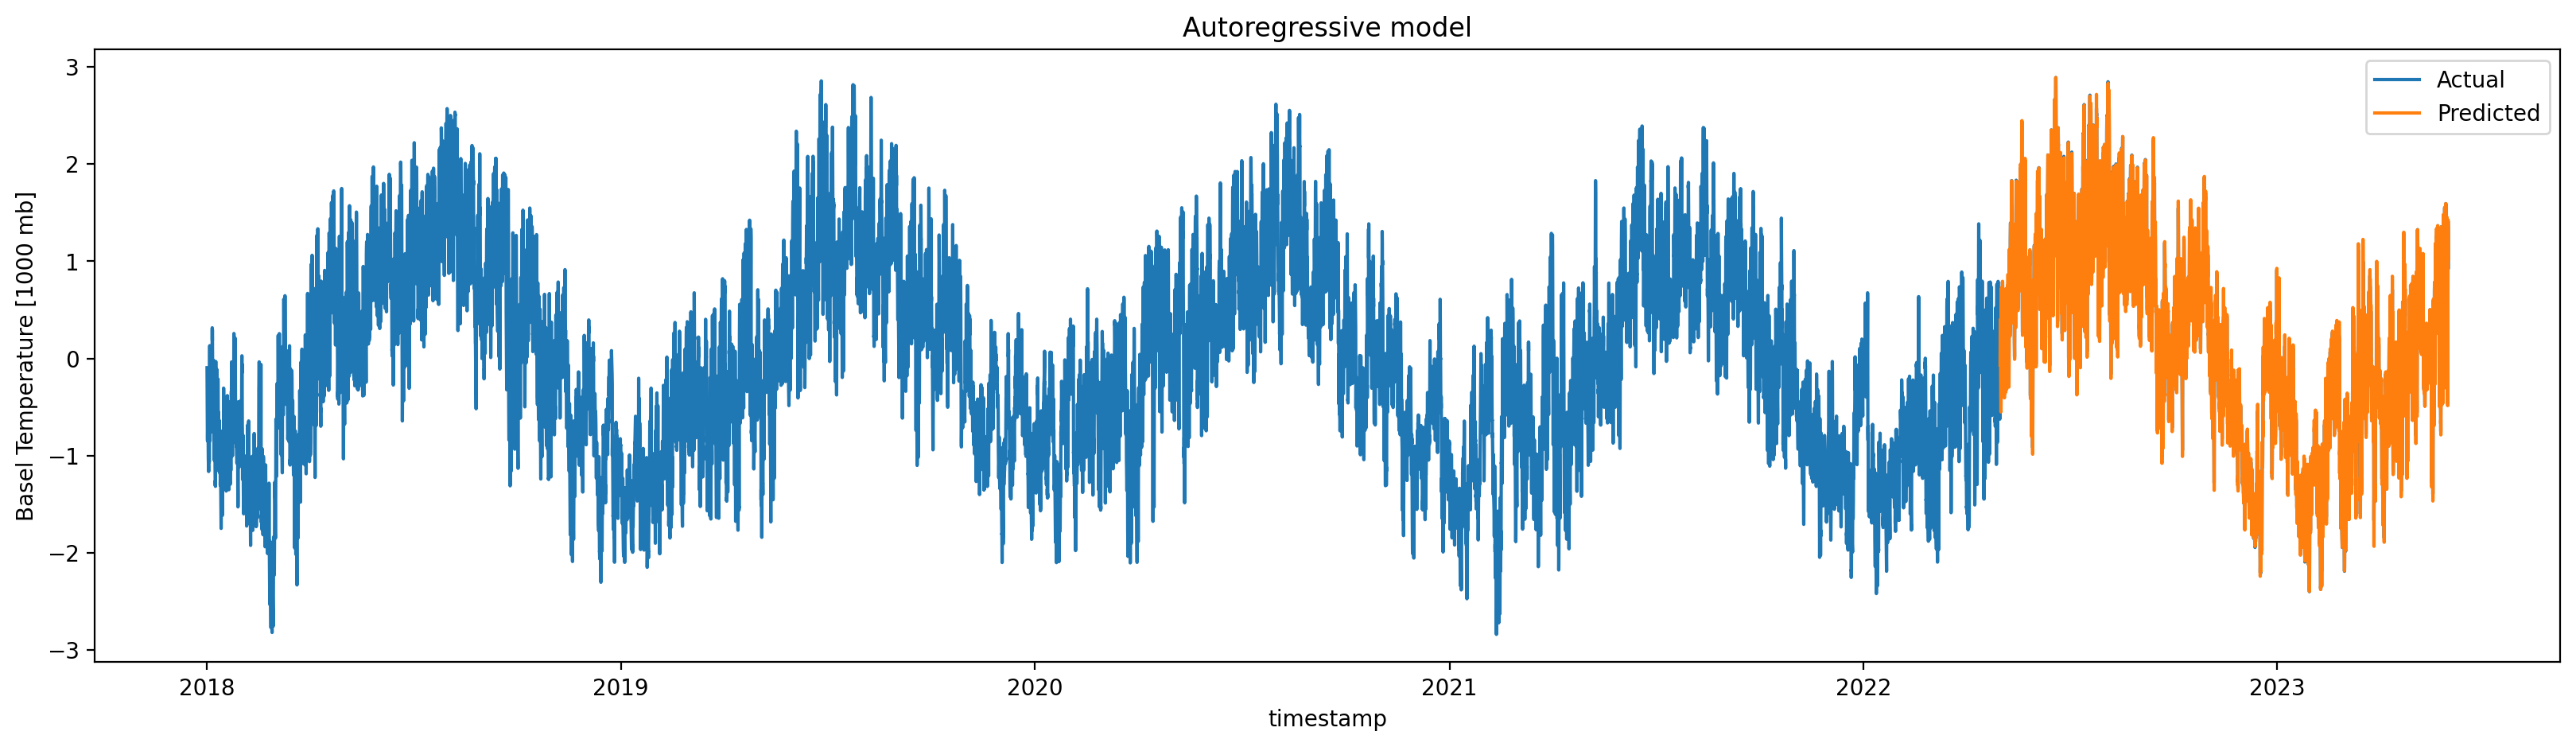

In [22]:
# Create the hours for the x-axis
hours = np.array(df["timestamp"])

# Plot the actual values and predictions
plt.figure(figsize=(20,5), dpi=200)
plt.plot(hours, data, label="Actual")
plt.plot(hours[len(train_data):], pred_ar, label="Predicted")
plt.title("Autoregressive model")
plt.xlabel("timestamp")
plt.ylabel("Basel Temperature [1000 mb]")
plt.legend()
plt.show()

Text(0.5, 0, 'timestamp')

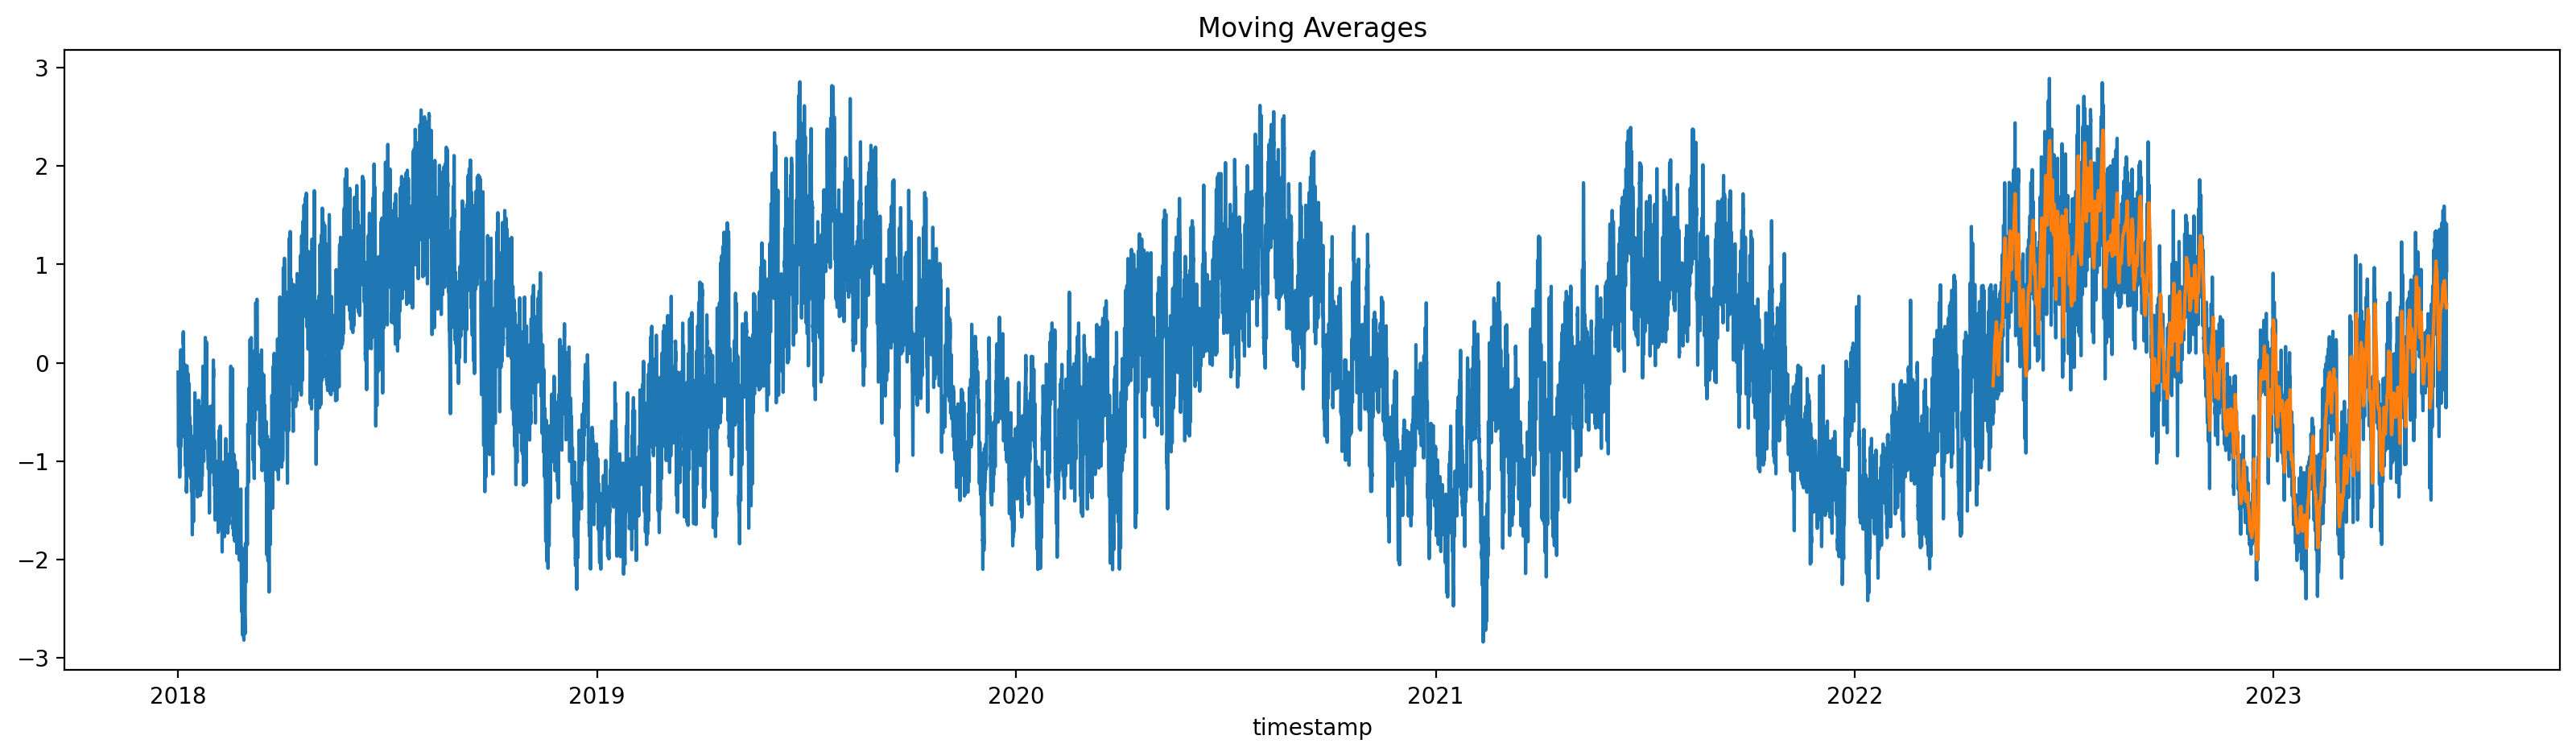

In [23]:
# Setting MA models 

# Simple moving average
df['Basel Temperature [1000 mb] Normalized'] = data
SMA2 = pd.Series(df['Basel Temperature [1000 mb] Normalized'].rolling(window=24).mean())

plt.figure(figsize=(20, 5), dpi=200)
plt.title("Moving Averages")
plt.plot(df['timestamp'], data)
plt.plot(df['timestamp'][len(train_data):], SMA2[len(train_data):])
plt.xlabel("timestamp")

In [24]:
from statsmodels.tsa.arima.model import ARIMA

#Fit ARIMA model 
p, d, q = 2, 0, 2
model = ARIMA(data, order=(p, d, q))
arima_fit = model.fit()

#Summary of the model
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                47448
Model:                 ARIMA(2, 0, 2)   Log Likelihood               48354.040
Date:                Thu, 15 Jun 2023   AIC                         -96696.079
Time:                        18:28:35   BIC                         -96643.475
Sample:                             0   HQIC                        -96679.561
                              - 47448                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.037      0.003      0.997      -0.073       0.073
ar.L1          1.6754      0.007    247.956      0.000       1.662       1.689
ar.L2         -0.6853      0.007   -102.454      0.000      -0.698      -0.672
ma.L1         -0.1071      0.007    -15.456      0.000      -0.121      -0.094
ma.L2          0.0103      0.005      1.982      0.048       0.000       0.021
sigma2         0.0076   2.05e-05    372.355      0.000       0.008       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            256124.36
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
# Make predictions on the test set
pred_arima = arima_fit.predict(start=len(train_data), end=len(data) - 1)

# Evaluate the model
mse = mean_squared_error(test_data, pred_arima)
mae = mean_absolute_error(test_data, pred_arima)

# Print evaluation metrics
print("ARIMA model performance metrics")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

ARIMA model performance metrics
Mean Squared Error (MSE): 0.007736523627955838
Mean Absolute Error (MAE): 0.059037881342662815


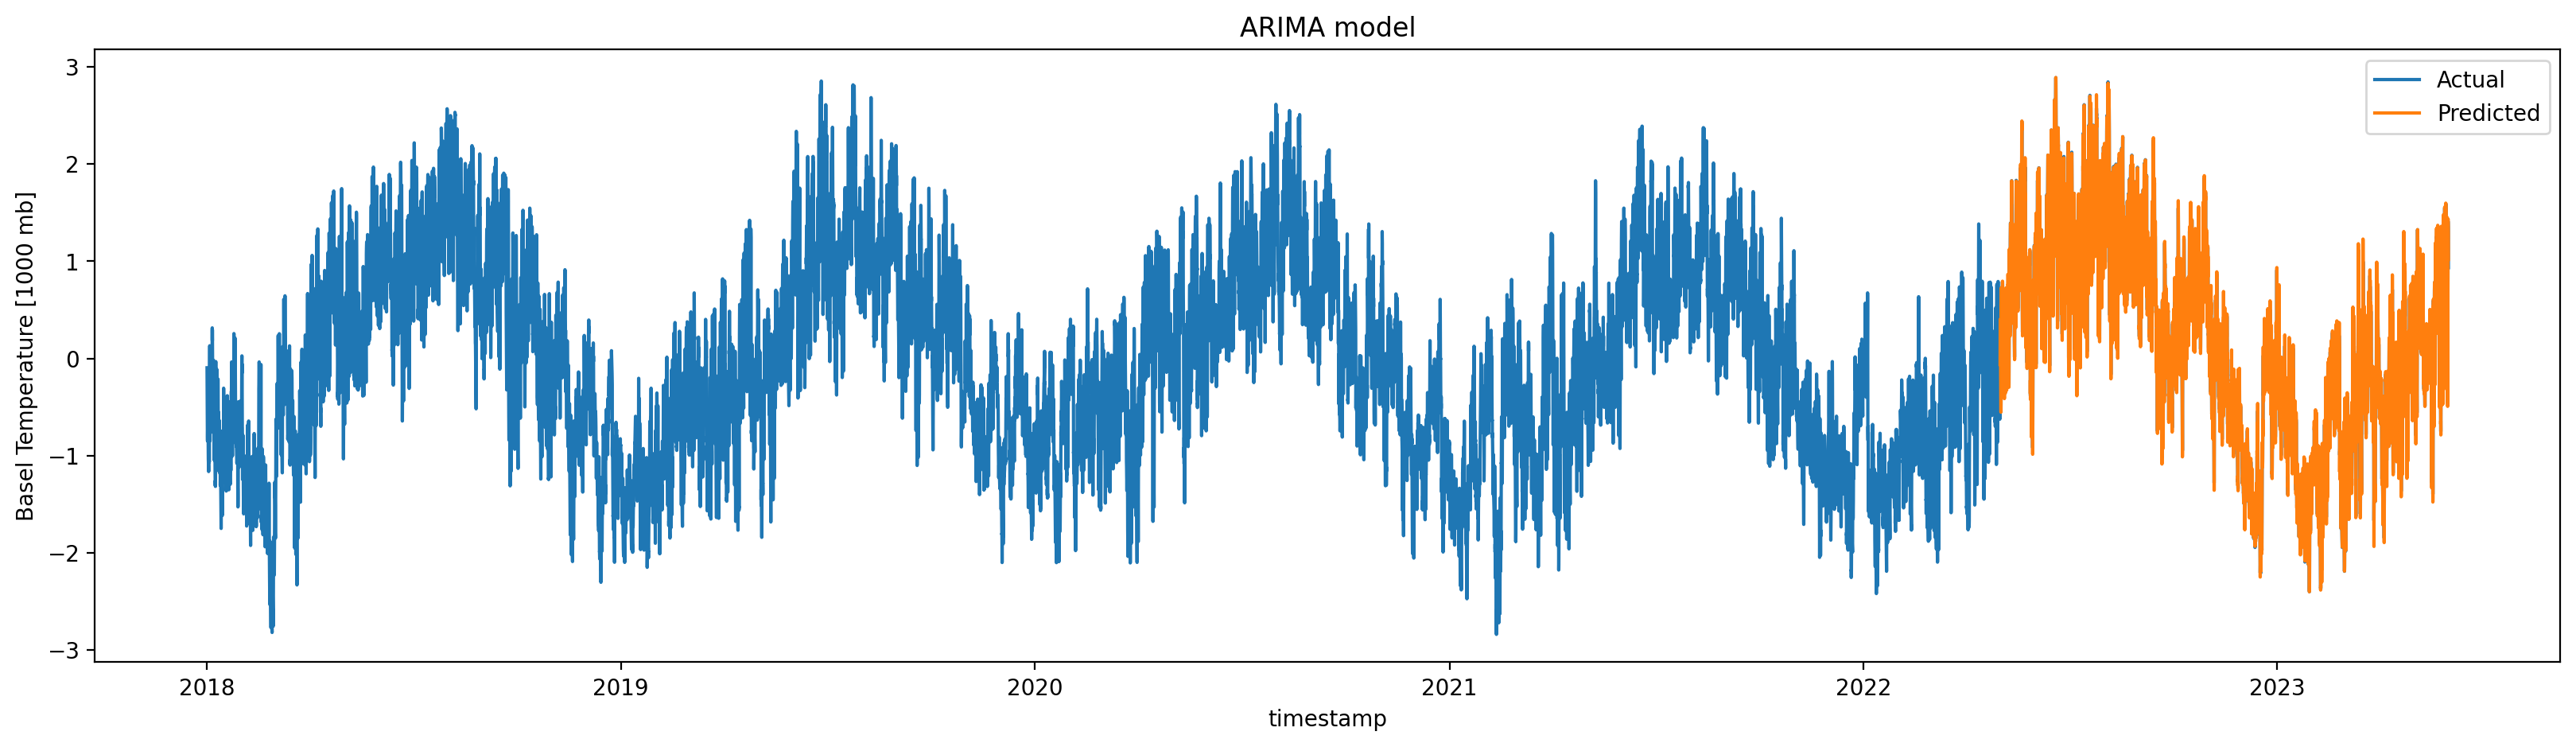

In [26]:
# Create the hours for the x-axis
hours = np.array(df["timestamp"])

# Plot the actual values and predictions
plt.figure(figsize=(20,5), dpi=200)
plt.plot(hours, data, label="Actual")
plt.plot(hours[len(train_data):], pred_arima, label="Predicted")
plt.title("ARIMA model")
plt.xlabel("timestamp")
plt.ylabel("Basel Temperature [1000 mb]")
plt.legend()
plt.show()

<Axes: title={'center': 'Seasonal Differenced plot'}, xlabel='timestamp', ylabel='Basel Temperature [1000 mb]'>

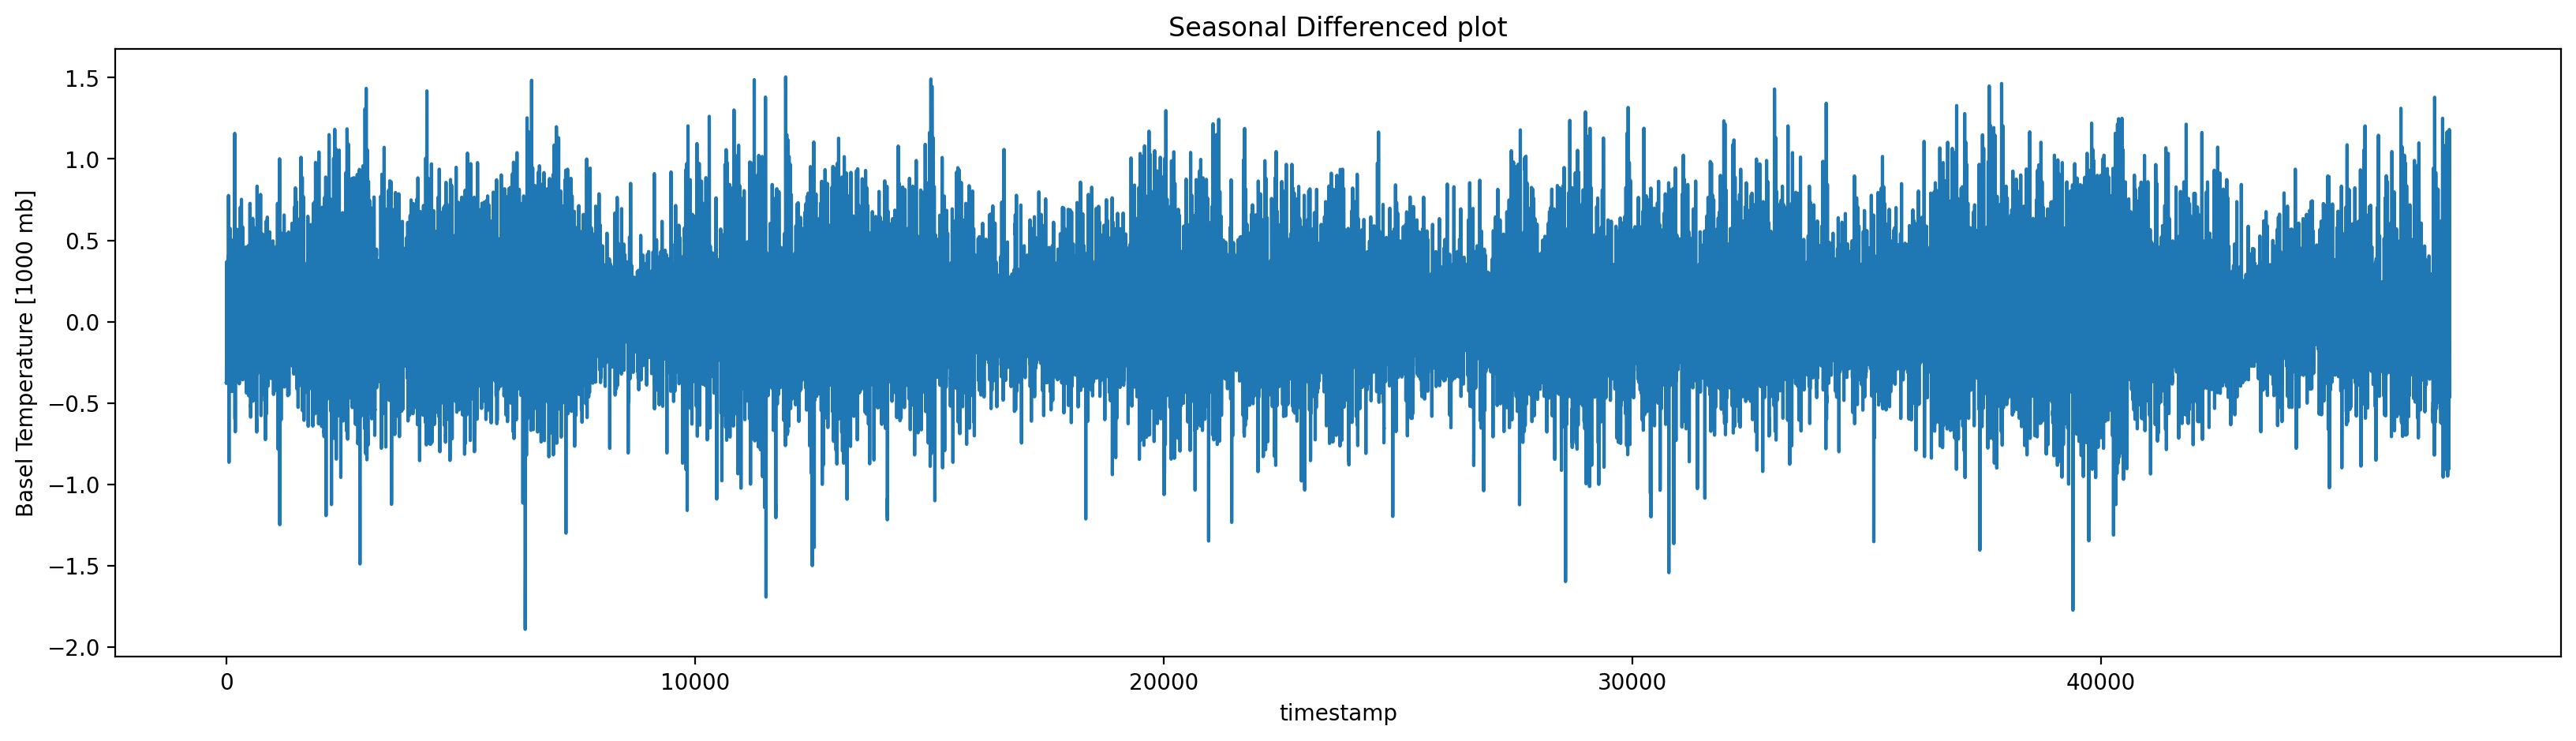

In [27]:
# Apply seasonal differencing based on patterns observed on graph
df['Seasonal First Difference'] = df['Basel Temperature [1000 mb] Normalized'] - df['Basel Temperature [1000 mb] Normalized'].shift(4) # 4 hours season

# Remove NAN values from DataFrame
df.dropna(inplace=True)
df.head(n=15)
seasonal_data = df['Seasonal First Difference'].values

# Plot after differencing
plt.figure(figsize=(20, 5), dpi=200)
plt.xlabel('timestamp')
plt.ylabel('Basel Temperature [1000 mb]')
plt.title('Seasonal Differenced plot')
df['Seasonal First Difference'].plot()

In [28]:
# Perform the stationarity check using the augmented Dicky-Fuller test
result = adfuller(df['Seasonal First Difference'])
print("ADF Statistic: ", result[0])
print("P-value: ", result[1])
print("Critical values: ")
#Key represent the significance level and value represents the corresponding critical value
for key, value in result[4].items():
    print(f"{key}: {value}")
    
# Conclusion 
print("\nInterpretation:")
if result[1] < 0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("Strong evidence against the alternative hypothesis, failed to reject the null hypothesis. Data has unit root and is non-stationary")

ADF Statistic:  -34.11532586934004
P-value:  0.0
Critical values: 
1%: -3.4304880081516695
5%: -2.861600996694575
10%: -2.566802466536089

Interpretation:
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


C:\Users\langk\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


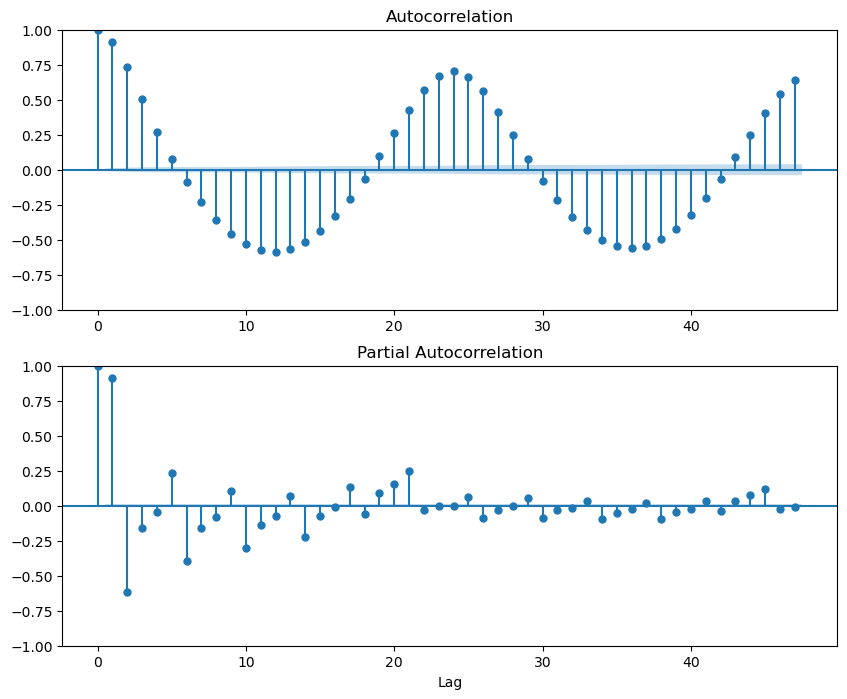

In [29]:
# Plot the ACF and PACF for the seasonal differenced time series
fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
sm.graphics.tsa.plot_acf(seasonal_data, ax=ax1)
sm.graphics.tsa.plot_pacf(seasonal_data, ax=ax2)
plt.xlabel('Lag')
plt.show()

In [30]:
# Fit Seasonal ARIMA model 
model = ARIMA(data, seasonal_order=(2,1,2,4)) # (p,d,q,s)
sarima_fit = model.fit()

#Summary of the model
sarima_fit.summary()

C:\Users\langk\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                47448
Model:             ARIMA(2, 1, [1, 2], 4)   Log Likelihood                2479.043
Date:                    Thu, 15 Jun 2023   AIC                          -4948.086
Time:                            18:29:18   BIC                          -4904.250
Sample:                                 0   HQIC                         -4934.321
                                  - 47448                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L4        0.9993      0.000   3468.142      0.000       0.999       1.000
ar.S.L8       -0.9985      0.000  -3901.206      0.000      -0.999      -0.998
ma.S.L4       -0.9794      0.002   -555.769      0.000      -0.983      -0.976
ma.S.L8        0.9333      0.002    560.822      0.000       0.930       0.937
sigma2         0.0527      0.000    229.297      0.000       0.052       0.053
===================================================================================
Ljung-Box (L1) (Q):               33391.42   Jarque-Bera (JB):             14144.80
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
# Make predictions on the test set
pred_sarima = sarima_fit.predict(start=len(train_data), end=len(data) - 1)

# Evaluate the model
mse = mean_squared_error(test_data, pred_sarima)
mae = mean_absolute_error(test_data, pred_sarima)

# Print evaluation metrics
print("ARIMA model performance metrics")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

ARIMA model performance metrics
Mean Squared Error (MSE): 0.0518976167765613
Mean Absolute Error (MAE): 0.16992720304722625


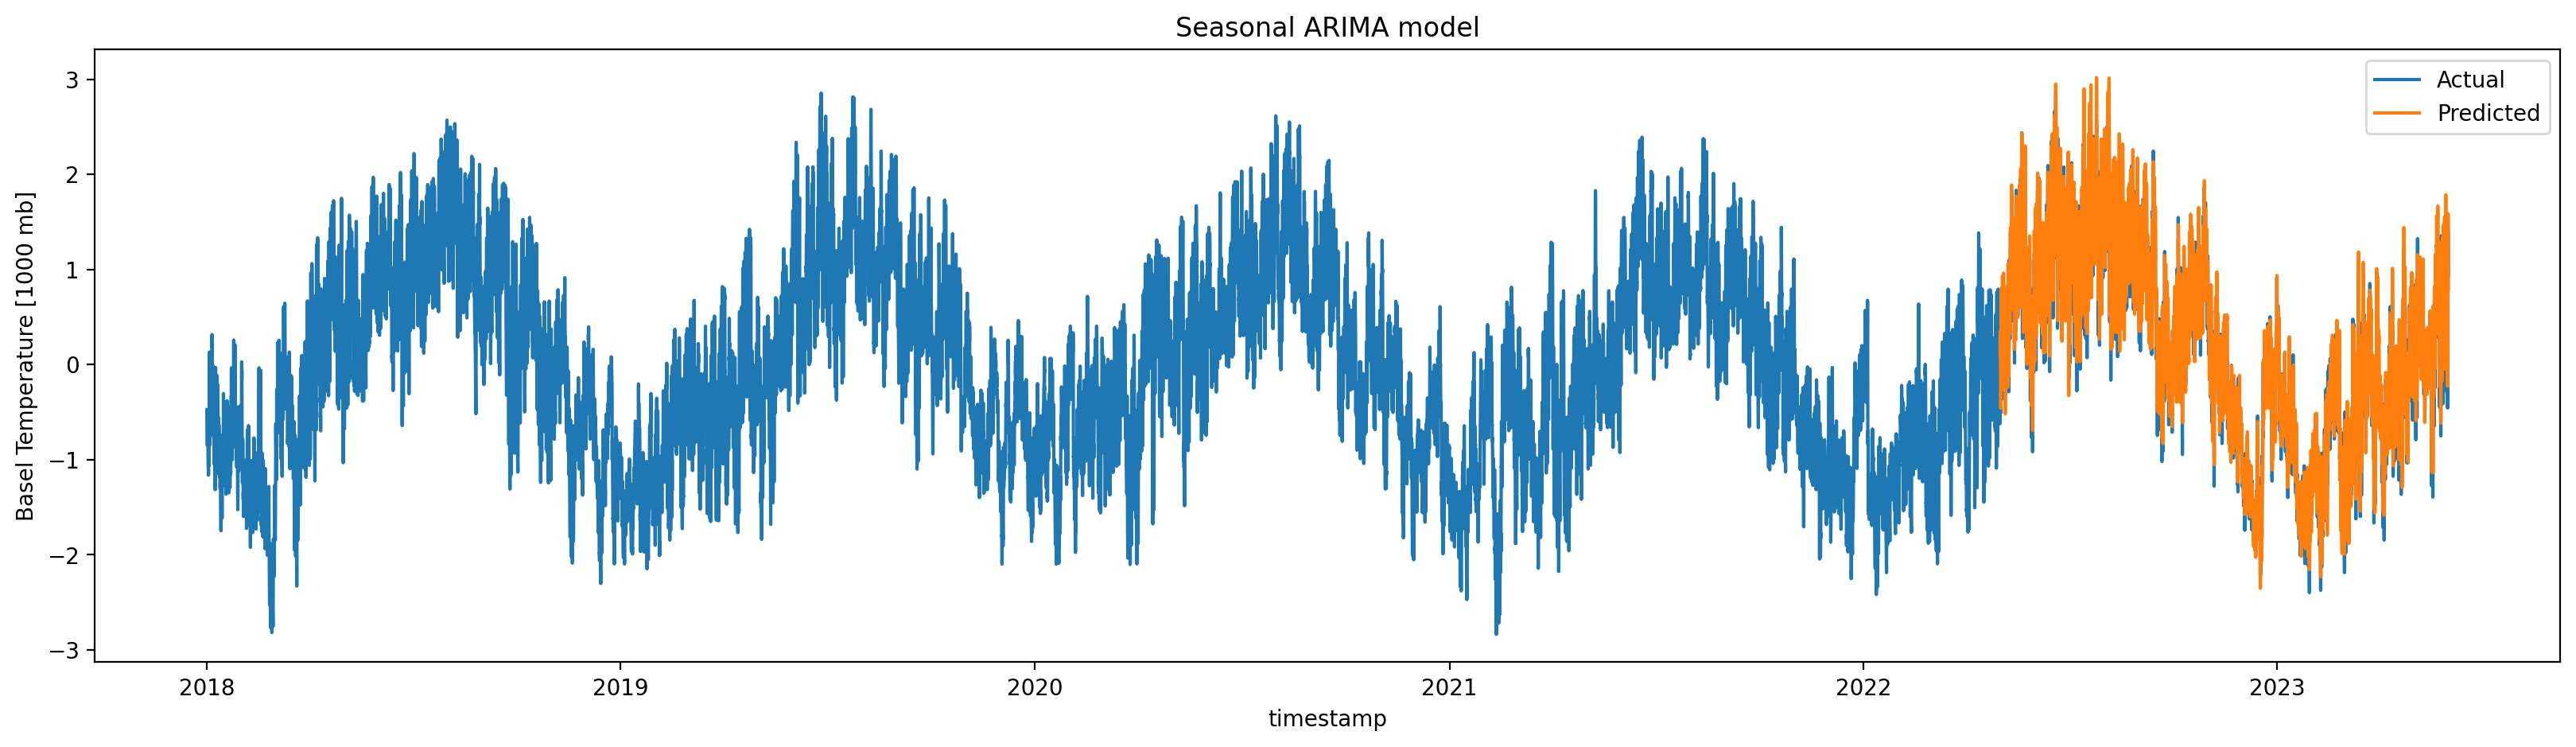

In [32]:
# Create the hours for the x-axis
hours = np.array(df["timestamp"])

# Plot the actual values and predictions
plt.figure(figsize=(20,5), dpi=200)
plt.plot(hours, data[4:], label="Actual")
plt.plot(hours[len(train_data)-4:], pred_sarima, label="Predicted")
plt.title("Seasonal ARIMA model")
plt.xlabel("timestamp")
plt.ylabel("Basel Temperature [1000 mb]")
plt.legend()
plt.show()